<font color='blue'> <h1> Прогнозирование удоев и вкуса молока

Описание проекта<br>
В IT-компанию, которая выполняет на заказ проекты по машинному обучению, обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».<br>
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!<br>
Поэтому он просит IT-компанию разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. IT-компании нужно создать две прогнозные модели для отбора бурёнок в поголовье:<br>
<br><b>
1.	Первая будет прогнозировать возможный удой коровы (целевой признак Удой);<br>
2.	Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).<br>
<br>
С помощью модели нужно отобрать коров по двум критериям:<br>
·	средний удой за год — не менее 6000 килограммов;<br>
·	молоко должно быть вкусным.<br>
<br></b>
Описание данных:<br>
<br>
1. Файл <b>ferma_main.csv </b>содержит данные о стаде фермера на текущий момент. Описание данных: <br>
·	id — уникальный идентификатор коровы.<br>
·	Удой, кг — масса молока, которую корова даёт в год (в килограммах).<br>
·	ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.<br>
·	Сырой протеин, г — содержание сырого протеина в корме (в граммах).<br>
·	СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.<br>
·	Порода — порода коровы.<br>
·	Тип пастбища — ландшафт лугов, на которых паслась корова.<br>
·	порода папы_быка — порода папы коровы.<br>
·	Жирность,% — содержание жиров в молоке (в процентах).<br>
·	Белок,% — содержание белков в молоке (в процентах).<br>
·	Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).<br>
·	Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).<br>
<br>
Признаки в датасете ferma_main.csv можно разделить на группы.<br>
·	Характеристики коровы: id, Порода, порода папы_быка, Возраст.<br>
·	Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).<br>
·	Характеристика пастбища: Тип пастбища.<br>
·	Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.<br>
Такое разделение поможет понять, как взаимосвязаны признаки в датасете.<br>
<br>
2. Файл <b>ferma_dad.csv</b> хранит имя папы каждой коровы в стаде фермера. Описание данных: <br>
·	id — уникальный идентификатор коровы.<br>
·	Имя Папы — имя папы коровы.<br>
<br>
3. Файл <b>cow_buy.csv</b> — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных: <br>
·	Порода — порода коровы.<br>
·	Тип пастбища — ландшафт лугов, на которых паслась корова.<br>
·	порода папы_быка — порода папы коровы.<br>
·	Имя_папы — имя папы коровы.<br>
·	Текущая_жирность,% — содержание жиров в молоке (в процентах).<br>
·	Текущий_уровень_белок,% — содержание белков в молоке (в процентах).<br>
·	Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).<br>
<br>
Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.<br>
·	Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.<br>
·	Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.<br>
·	Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!<br>

In [1]:
%%capture
# install phik (if not installed yet)
import sys

!"{sys.executable}" -m pip install phik

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas.plotting
import phik
import sklearn
import math

from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from IPython.display import Image

from scipy.stats import sem, t
from scipy import mean

<font color='blue'> <h1> 1. Загрузка данных

<font color='blue'> <h3> 1.1. Загрузим данные в датафреймы pandas.</h3> </font><br>
·	/datasets/ferma_main.csv<br>
·	/datasets/ferma_dad.csv<br>
·	/datasets/cow_buy.csv<br>

In [3]:
# Посмотрим информацию о стаде фермера на текущий момент в файле ferma_main.csv
# Загрузим данные с учётом разделителей и сразу заменим тип данных на соответствующий своему типу методом decimal = ','
ferma_main = pd.read_csv('ferma_main.csv', sep = ';', decimal = ',')
ferma_main.head()

id  Удой, кг  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                   14.2              1743   
1   2      5529                                   12.8              2138   
2   3      5810                                   14.0              1854   
3   4      5895                                   12.4              2012   
4   5      5302                                   12.8              1675   

   СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0.890   Вис Бик Айдиал    Равнинное   
1                                 0.890   Вис Бик Айдиал    Равнинные   
2                                 0.885  РефлешнСоверинг    Холмистое   
3                                 0.885  РефлешнСоверинг    Холмистое   
4                                 0.885   Вис Бик Айдиал    Равнинные   

  порода папы_быка  Жирность,%  Белок,% Вкус молока      Возраст  
0           Айдиал        3.58    3.076      вкусно  более_2_лет  
1          Соверин        3.54    3.079      вкусно  менее_2_лет  
2          Соверин        3.59    3.074   не вкусно  более_2_лет  
3           Айдиал        3.40    3.075   не вкусно  более_2_лет  
4          Соверин        3.73    3.073      вкусно  менее_2_лет

---

In [4]:
# Посмотрим информацию о именах папы каждой коровы в стаде фермера в файле ferma_dad.csv
ferma_dad = pd.read_csv('ferma_dad.csv', sep = ';', decimal = ',')
ferma_dad.head()

id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

---

In [5]:
# Посмотрим информацию о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой в файле cow_buy.csv
cow_buy = pd.read_csv('cow_buy.csv', sep = ';', decimal = ',')
cow_buy.head()

Порода Тип пастбища порода папы_быка  Имя_папы  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный   
2  РефлешнСоверинг    равнинное          Соверин     Барин   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный   

   Текущая_жирность,%  Текущий_уровень_белок,%      Возраст  
0                3.58                    3.076  более_2_лет  
1                3.54                    3.081  менее_2_лет  
2                3.59                    3.074  более_2_лет  
3                3.40                    3.061  более_2_лет  
4                3.64                    3.074  более_2_лет

<font color='blue'> <h3> 1.2. Изучим данные. </h3> </font><br>
    Определим, соответствуют ли они описанию задачи и стандартам оформления данных. При необходимости переименуем столбцы.<br>

In [6]:
# данные об информации в датафрейме ferma_main
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

Пропусков данных нет, типы данных соответствуют своему типу

In [7]:
# Переименуем названия столбцов
ferma_main = ferma_main.rename(columns ={'Удой, кг': 'удой_кг', 'ЭКЕ (Энергетическая кормовая единица)':'эке', \
                                              'Сырой протеин, г':'протеин_г', 'СПО (Сахаро-протеиновое соотношение)':'спо', \
                                              'Порода': 'порода', 'Тип пастбища': 'тип_пастбища', \
                                              'порода папы_быка': 'порода_папы_быка', 'Жирность,%': 'жирность,%', \
                                              'Вкус молока': 'вкус_молока', 'Белок,%': 'белок,%', 'Возраст': 'возраст'})
ferma_main.head(1)

id  удой_кг   эке  протеин_г   спо          порода тип_пастбища  \
0   1     5863  14.2       1743  0.89  Вис Бик Айдиал    Равнинное   

  порода_папы_быка  жирность,%  белок,% вкус_молока      возраст  
0           Айдиал        3.58    3.076      вкусно  более_2_лет

---
---

In [8]:
# данные об информации в датафрейме ferma_dad
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


Пропусков данных нет, типы данных соответствуют своему типу

In [9]:
# Переименуем названия столбцов, заменим пробелы на нижнее подчеркивание
ferma_dad.columns = ferma_dad.columns.str.lower()
ferma_dad.columns = ferma_dad.columns.str.replace(" ", "_")
ferma_dad.head(1)

id имя_папы
0   1   Буйный

---
---

In [10]:
# данные об информации в датафрейме cow_buy
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


Пропусков данных нет, типы данных соответствуют своему типу

In [11]:
# Переименуем названия столбцов, заменим пробелы на нижнее подчеркивание
cow_buy.columns = cow_buy.columns.str.lower()
cow_buy.columns = cow_buy.columns.str.replace(" ", "_")
cow_buy.head(1)

порода тип_пастбища порода_папы_быка  имя_папы  текущая_жирность,%  \
0  Вис Бик Айдиал    холмистое           Айдиал  Геркулес                3.58   

   текущий_уровень_белок,%      возраст  
0                    3.076  более_2_лет

<font color='blue'> <h1>2. Предобработка данных

Проверим данные на наличие пропусков и дубликатов. При необходимости устраним все проблемы с данными.
<br>
Предобработка направлена на то, чтобы устранить аномалии данных, пропуски, выбросы и дубликаты, которые могли появиться из-за разных ошибок.

<font color='blue'> <h3> 2.1. Удаление полных дубликатов.</h3>

Нулевых значений нет. <br>
Проверим дубликаты. (Могут быть полные совпадения данных - например коровы близнецы). <br>
Для корректного обучения будущей модели, найдём эти данные и удалим. В других базах полные дубликаты нам не помешают. <br>

In [12]:
# Проверим полные дубликаты в базе ferma_main.
ferma_main.duplicated().sum()

5

In [13]:
ferma_main = ferma_main.drop_duplicates()
ferma_main.duplicated().sum()

0

<font color='blue'> <h3> 2.2. Проверка уникальных значений категориальных данных на неявные совпадения.</h3>

In [14]:
# сравним категориальные данные из трёх баз ferma_main, cow_buy, ferma_dad. Приведём данные к единообразию
pd.unique(ferma_main[['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']].values.ravel())

array(['Вис Бик Айдиал', 'Равнинное', 'Айдиал', 'вкусно', 'более_2_лет',
       'Равнинные', 'Соверин', 'менее_2_лет', 'РефлешнСоверинг',
       'Холмистое', 'не вкусно', 'Айдиалл'], dtype=object)

In [15]:
pd.unique(cow_buy[['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'возраст']].values.ravel())

array(['Вис Бик Айдиал', 'холмистое', 'Айдиал', 'Геркулес', 'более_2_лет',
       'равнинное', 'Соверин', 'Буйный', 'менее_2_лет', 'РефлешнСоверинг',
       'Барин', 'Соловчик'], dtype=object)

In [16]:
pd.unique(ferma_dad['имя_папы'].values.ravel())

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

<font color='blue'> <h3> 2.3. Замена значений категориальных данных имеющих неявные совпадения.</h3>

In [17]:
# ferma_main
# Заменим значение категории тип пастбища: 'Равнинные' и 'Равнинное' на 'равнинное'
# Заменим значения в породах папы быка: 'Айдиалл' на 'Айдиал'

ferma_main['порода_папы_быка'] =\
ferma_main['порода_папы_быка'].replace('Айдиалл', 'Айдиал')
ferma_main['тип_пастбища'] =\
ferma_main['тип_пастбища'].replace(['Равнинные', 'Равнинное', 'Холмистое'],\
                                       ['равнинное', 'равнинное', 'холмистое'])

pd.unique(ferma_main[['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']].values.ravel())

<ipython-input-17-20339fe9e5b9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ferma_main['порода_папы_быка'] =\
<ipython-input-17-20339fe9e5b9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ferma_main['тип_пастбища'] =\


array(['Вис Бик Айдиал', 'равнинное', 'Айдиал', 'вкусно', 'более_2_лет',
       'Соверин', 'менее_2_лет', 'РефлешнСоверинг', 'холмистое',
       'не вкусно'], dtype=object)

<font color='blue'> <h1>3. Исследовательский анализ данных

План работы: <br>
1.	Проведём статистический анализ всех признаков.<br>
2.	Построим графики, которые описывают все признаки. Для количественных графиков построим гистограммы и ящики с усами, а для категориальных данных построим круговую диаграмму долей.<br>
3.	Сделаем вывод о данных: <br>
·	напишем наблюдения о выбросах, необычных распределениях количественных данных и других особенностях датасетов.<br>
·	расскажем, как планируем улучшить данные.<br>


<font color='blue'> <h2>3.1. ferma_main - цифровые данные

In [18]:
# Выполним статистический анализ цифровых признаков в базе ferma_main - о стаде фермера на текущий момент
ferma_main.describe(percentiles = [0.25, 0.50, 0.75])

id       удой_кг         эке    протеин_г         спо  \
count  629.00000    629.000000  629.000000   629.000000  629.000000   
mean   315.00000   6188.750397   14.543879  1923.364070    0.913116   
std    181.72094   1644.795489    1.306408   182.956251    0.032203   
min      1.00000   5204.000000   10.900000  1660.000000    0.840000   
25%    158.00000   5751.000000   13.500000  1771.000000    0.890000   
50%    315.00000   6133.000000   14.700000  1888.000000    0.930000   
75%    472.00000   6501.000000   15.600000  2062.000000    0.940000   
max    629.00000  45616.000000   16.800000  2349.000000    0.960000   

       жирность,%     белок,%  
count  629.000000  629.000000  
mean     3.603657    3.075671  
std      0.168656    0.002549  
min      2.990000    3.069000  
25%      3.590000    3.074000  
50%      3.650000    3.076000  
75%      3.720000    3.077000  
max      3.750000    3.085000

Очевидным выбросом в данных является максимальное значение удоев в размере 45616 кг.
Остальные данные надо анализировать точнее. Для этого построим графики распределений и "ящики с усами"

In [19]:
# Вычислим границу данных за которыми значения будут считаться нетипичными (выбросы)
percent_ferma = ferma_main.describe(percentiles = [0.25, 0.50, 0.75]).T
percent_ferma['Q1-1.5(Q3-Q1)'] = percent_ferma['25%'] - 1.5 * (percent_ferma['75%'] - percent_ferma['25%'])
percent_ferma['Q3+1.5(Q3-Q1)'] = percent_ferma['75%'] + 1.5 * (percent_ferma['75%'] - percent_ferma['25%'])
percent_ferma

count         mean          std       min       25%       50%  \
id          629.0   315.000000   181.720940     1.000   158.000   315.000   
удой_кг     629.0  6188.750397  1644.795489  5204.000  5751.000  6133.000   
эке         629.0    14.543879     1.306408    10.900    13.500    14.700   
протеин_г   629.0  1923.364070   182.956251  1660.000  1771.000  1888.000   
спо         629.0     0.913116     0.032203     0.840     0.890     0.930   
жирность,%  629.0     3.603657     0.168656     2.990     3.590     3.650   
белок,%     629.0     3.075671     0.002549     3.069     3.074     3.076   

                 75%        max  Q1-1.5(Q3-Q1)  Q3+1.5(Q3-Q1)  
id           472.000    629.000      -313.0000       943.0000  
удой_кг     6501.000  45616.000      4626.0000      7626.0000  
эке           15.600     16.800        10.3500        18.7500  
протеин_г   2062.000   2349.000      1334.5000      2498.5000  
спо            0.940      0.960         0.8150         1.0150  
жирность,%     3.720      3.750         3.3950         3.9150  
белок,%        3.077      3.085         3.0695         3.0815

In [20]:
# Image("https://i.stack.imgur.com/ZN8N6.png")

<div class="alert alert-success">
Построим графики распределения цифровых показателей в стаде фермера. Выведем два типа диаграм - гистограммму, чтобы определить форму распределения и "ящик с усами", чтобы определить выбросы.

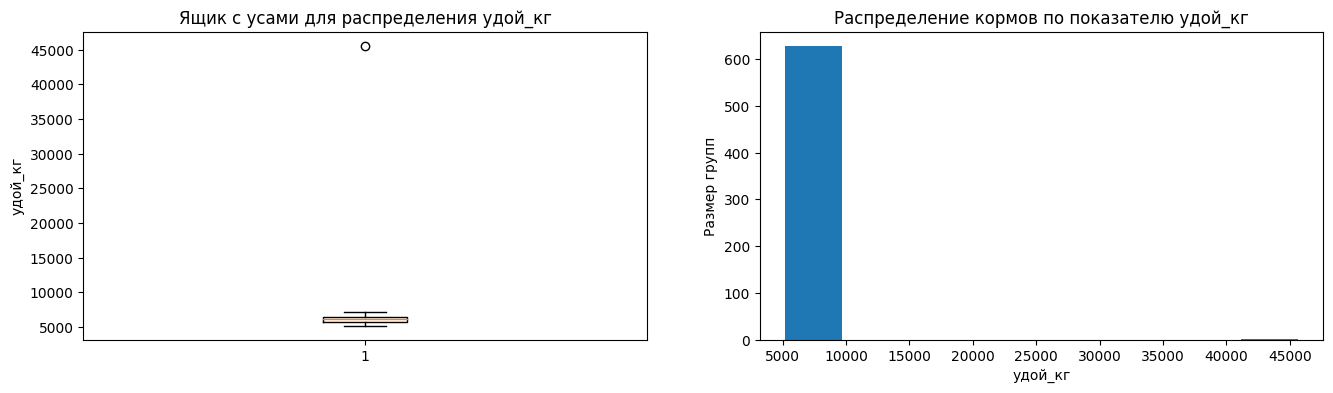

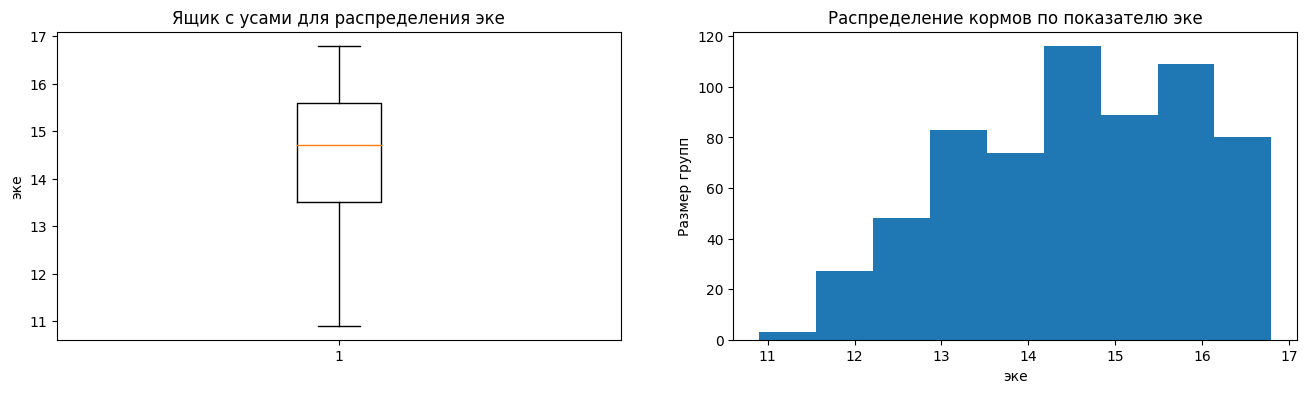

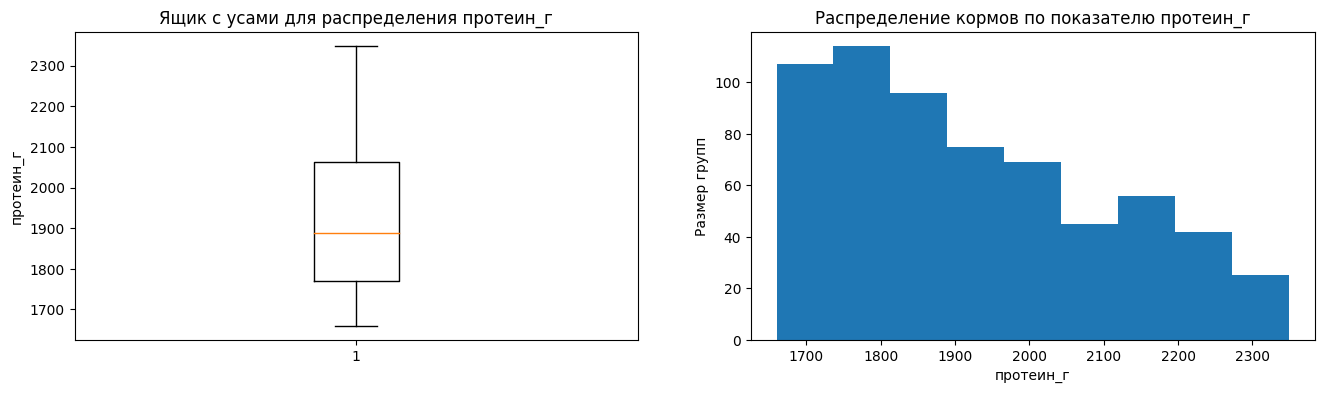

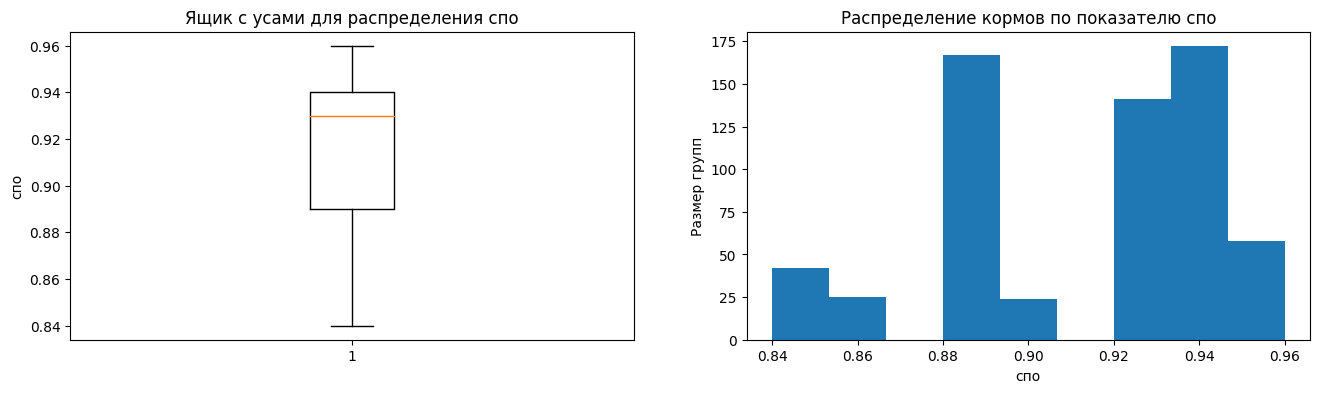

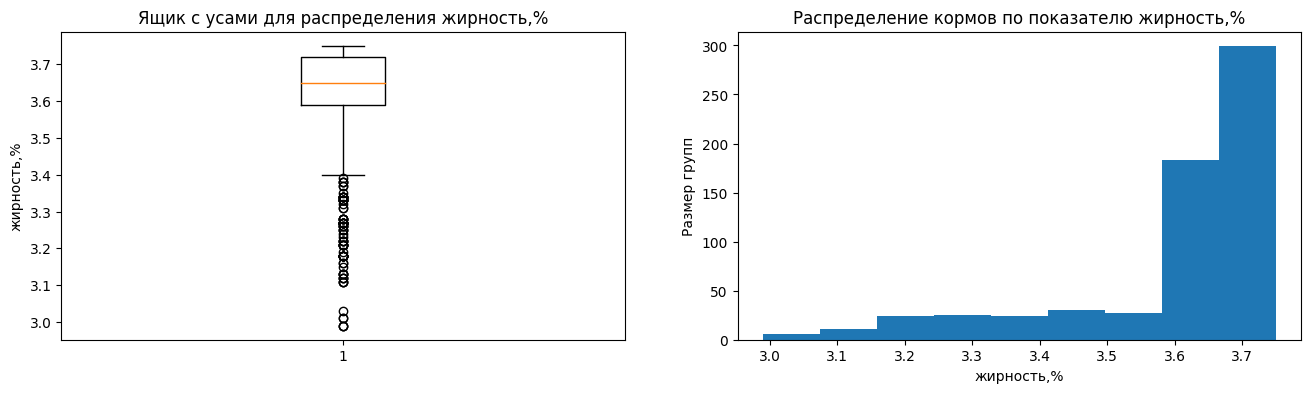

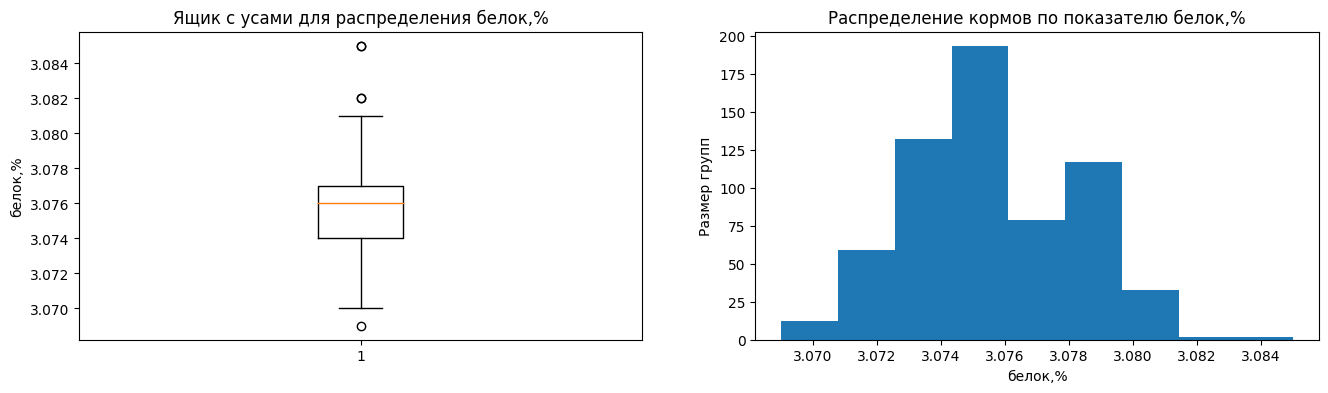

In [21]:
def boxplot_hist_figure(categories):

    fig, axes = plt.subplots(1, 2, figsize=(16, 4))

    axes[0].boxplot(ferma_main[categories])
    axes[0].set_title("Ящик с усами для распределения "+str(categories))
    axes[0].set_ylabel(str(categories));

    axes[1].hist(ferma_main[categories], bins = 9)
    axes[1].set_xlabel(str(categories))
    axes[1].set_ylabel("Размер групп")
    axes[1].set_title("Распределение кормов по показателю "+str(categories));

# Список названий столбцов имеющих числовые признаки
numeric_list = ferma_main.select_dtypes(include=["number"]).columns[1:7]

# С помощью цикла выведем все графики
for categories in numeric_list:
    boxplot_hist_figure(categories)

<font color='blue'> <h3>3.1.1 'спо' - сахаро-протеиновое соотношение

Для нормального обмена веществ сахара в рационе должно быть примерно столько, сколько переваримого протеина. В соответствии с «Нормами и рационами кормления сельскохозяйственных животных» (2003): сахаро-протеиновое отношение в рационах лактирующих коров должно быть в пределах 0,8–1,1. <br>
Снижение сахаро-протеинового отношения до 0,4–0,6 ухудшает использование питательных веществ, нарушает их обмен.

In [22]:
# Посмотрим распределение кормов по показателю СПО
# plt.figure(figsize = (12, 4))
# ferma_main['спо'].hist(bins = 9)
# plt.title("Распределение кормов по показателю СПО")
# plt.xlabel("Сахаро-протеиновое соотношение")
# plt.ylabel("Размер групп кормов")

# plt.show()

Наблюдаем три группы распределения СПО в кормах: 0.84-0.86; 0.88-0.9; 0.93-0.96

In [23]:
# Отрисуем ящики с усами для цифровых показателей. Выбросы за пределами 3-х сигм удалим,
# так как они будут мешать обучению модели.
# plt.figure(figsize=(6, 4))
# plt.boxplot(ferma_main['спо'])
# plt.title("Ящик с усами для распределения спо")
# plt.ylabel("спо")
# plt.show()
# ferma_main.shape

Выбросов нет

<font color='blue'> <h3>3.1.2. 'эке' - энергетическая кормовая единица

Энергетическая кормовая единица (ЭКЕ), показатель оценки питательности корма для животных. <br>
За одну ЭКЕ принято 10 МДж обменной энергии или 1 млн Дж. Этот метод основан на определении чистой энергии, выражаемой в ЭКЕ.

In [24]:
# Рассмотрим распределение 'ЭКЕ' (питательности корма)
# plt.figure(figsize = (12, 4))
# ferma_main['эке'].hist(bins = 10)
# plt.title("Распределение кормов по показателю ЭКЕ")
# plt.xlabel("Энергети́ческая кормова́я едини́ца")
# plt.ylabel("Размер групп кормов")

# plt.show()

In [25]:
# plt.figure(figsize=(6, 4))
# plt.boxplot(ferma_main['эке'])
# plt.title("Ящик с усами для распределения эке")
# plt.ylabel("эке")
# plt.show()
# ferma_main.shape

Выбросов нет

In [26]:
sigma_eke = np.std(ferma_main['эке'])
sigma_eke

# Стандартное отклонение равное 1,31 указывает на то, что большинство данных находятся в пределах одного
# стандартного отклонения от среднего значения, то есть на расстоянии 1,31 от среднего.

1.3053692073872682

<font color='blue'> <h3>3.1.3. 'протеин_г' — содержание сырого протеина в корме

Сырой протеин, г — содержание сырого протеина в корме (в граммах). Протеины кормов - основной источник азотистых веществ для синтеза белка тканей организма и образования продукции животных. Его количество непосредственно влияет на качество и
количество удоев коров. Недостаток протеина в рационе может привести к снижению удоев, а избыток – к нарушению обменных процессов и снижению качества продукции.

In [27]:
# plt.figure(figsize = (12, 4))
# ferma_main['протеин_г'].hist(bins = 10)
# plt.title("Распределение кормов относительно сырого протеина")
# plt.xlabel("Cодержание сырого протеина в корме")
# plt.ylabel("Размер групп кормов")
# plt.show()

In [28]:
# plt.figure(figsize=(6, 4))
# plt.boxplot(ferma_main['протеин_г'])
# plt.title("Ящик с усами для распределения протеина_г")
# plt.ylabel("протеин_г")
# plt.show()

Выбросов нет

In [29]:
sigma_protein = np.std(ferma_main['протеин_г'])
sigma_protein

# распределение данных не является нормальным распределением

182.81075912918197

<font color='blue'> <h3>3.1.4. 'удой_кг' — масса молока от коровы за год, кг.

In [30]:
ferma_main[ferma_main['удой_кг'] > 10000]

id  удой_кг   эке  протеин_г   спо          порода тип_пастбища  \
16  17    45616  11.5       1675  0.93  Вис Бик Айдиал    холмистое   

   порода_папы_быка  жирность,%  белок,% вкус_молока      возраст  
16           Айдиал        3.22    3.076      вкусно  более_2_лет

In [31]:
# Удалим строку с индексом 16
ferma_main = ferma_main.drop(index = 16)

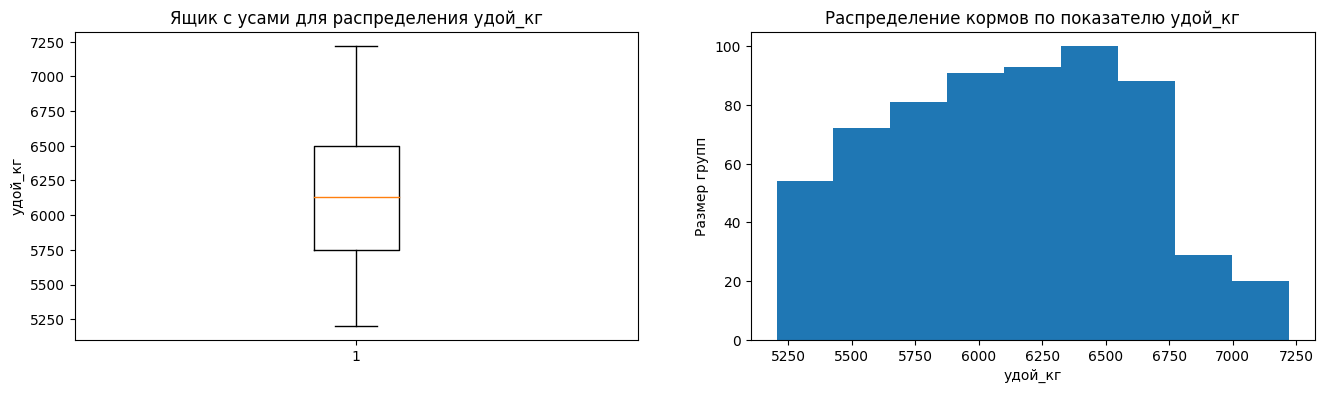

In [32]:
# Распределение удоев

def boxplot_hist_figure(categories):

    fig, axes = plt.subplots(1, 2, figsize=(16, 4))

    axes[0].boxplot(ferma_main[categories])
    axes[0].set_title("Ящик с усами для распределения "+str(categories))
    axes[0].set_ylabel(str(categories));

    axes[1].hist(ferma_main[categories], bins = 9)
    axes[1].set_xlabel(str(categories))
    axes[1].set_ylabel("Размер групп")
    axes[1].set_title("Распределение кормов по показателю "+str(categories));

# Список названий столбцов имеющих числовые признаки
numeric_list = ['удой_кг']

# С помощью цикла выведем все графики
for categories in numeric_list:
    boxplot_hist_figure(categories)

# В стаде фермера больше половины коров с удоями выше 6000 кг

Выбросов нет

<font color='blue'> <h3>3.1.5. 'жирность,%' — содержание жиров в молоке, %.

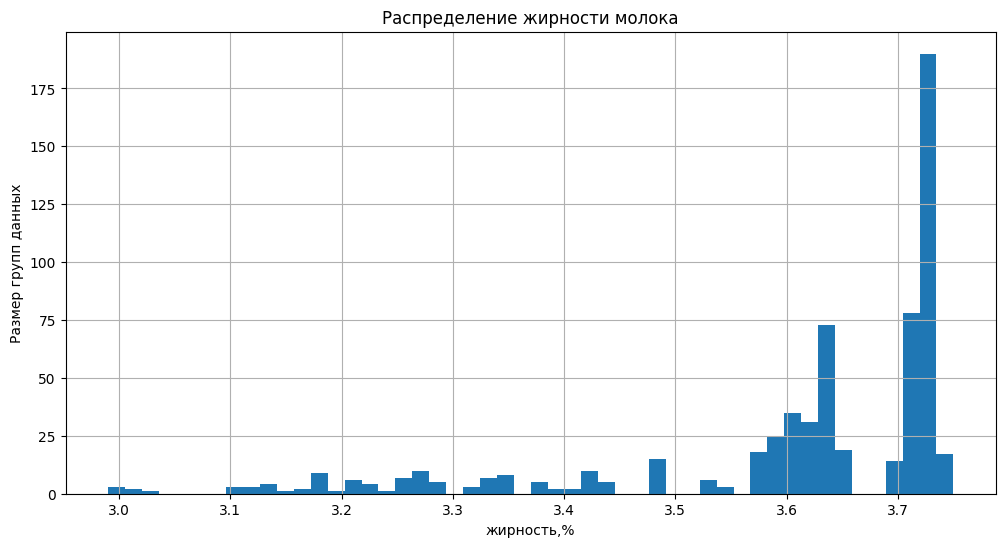

In [33]:
plt.figure(figsize=(12, 6))
ferma_main['жирность,%'].hist(bins = 50)
plt.title("Распределение жирности молока")
plt.xlabel("жирность,%")
plt.ylabel("Размер групп данных")

plt.show()

Показатели жирности молока в пределах нормы для коров

In [34]:
# plt.figure(figsize=(6, 4))
# plt.boxplot(ferma_main['жирность,%'])
# plt.title("Ящик с усами для жирности молока")
# plt.ylabel("Жирность,%")
# plt.show()

# Удалим выбросы
# Выбросы негативно влияют на точность модели: из-за них возрастает ошибка предсказания.

In [35]:
# Q1-1.5(Q3-Q1) = 3.4700;
# Q3+1.5(Q3-Q1) = 3.8700;
# ferma_main = ferma_main[(ferma_main['жирность,%'] > 3.47) & (ferma_main['жирность,%'] < 3.87)]
# plt.figure(figsize=(6, 4))
# plt.boxplot(ferma_main['жирность,%'])
# plt.title("Ящик с усами для жирности молока")
# plt.ylabel("Жирность,%")
# plt.show()
# ferma_main.shape

<font color='blue'> <h3>3.1.6. 'белок,%' — содержание белка в молоке, %.

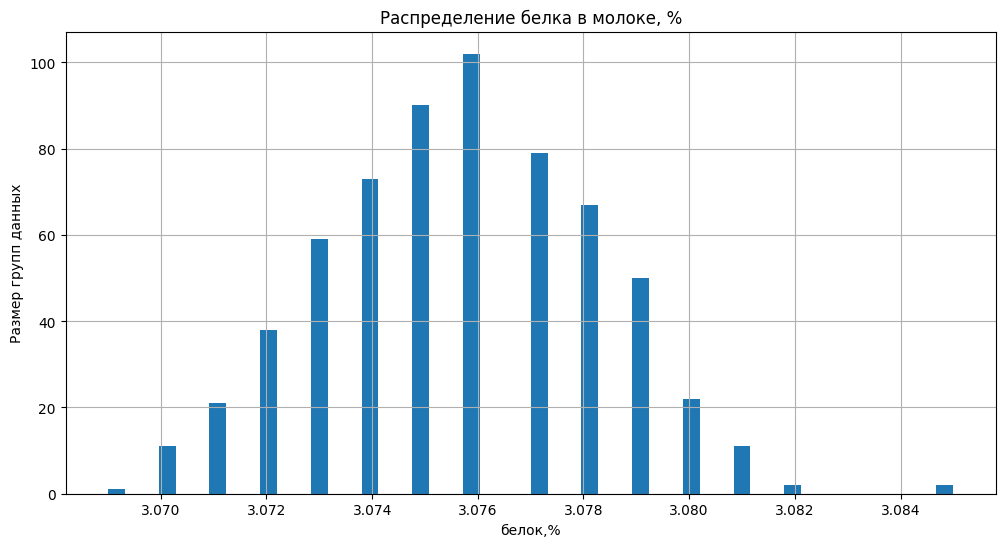

In [36]:
plt.figure(figsize=(12, 6))
ferma_main['белок,%'].hist(bins = 50)
plt.title("Распределение белка в молоке, %")
plt.xlabel("белок,%")
plt.ylabel("Размер групп данных")

plt.show()

# очень странный график, похоже на исскуственно созданные данные

Показатели бека в молоке находятся в пределах нормы для коров

In [37]:
# plt.figure(figsize=(6, 4))
# plt.boxplot(ferma_main['белок,%'])
# plt.title("Ящик с усами для содержания белка в молоке")
# plt.ylabel("белок,%")
# plt.show()

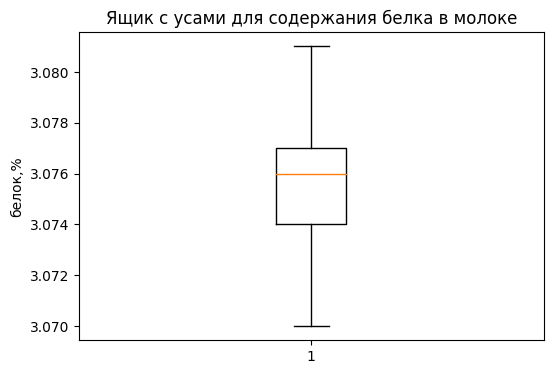

(623, 12)

In [38]:
# Q1-1.5(Q3-Q1) = 3.0695;
# Q3+1.5(Q3-Q1) = 3.0815;
ferma_main = ferma_main[(ferma_main['белок,%'] > 3.0695) & (ferma_main['белок,%'] < 3.0815)]
plt.figure(figsize=(6, 4))
plt.boxplot(ferma_main['белок,%'])
plt.title("Ящик с усами для содержания белка в молоке")
plt.ylabel("белок,%")
plt.show()
ferma_main.shape

<font color='blue'> <h2>3.2. ferma_main - категориальные  данные

<font color='blue'> <h3>3.2.1. 'порода_папы_быка' — распределение породы папы быка.

In [39]:
# Выполним статистический анализ категориальных признаков в базе ferma_main - о стаде фермера на текущий момент
poroda_cow_buy = ferma_main[['порода','порода_папы_быка']]
poroda_cow_buy = poroda_cow_buy.groupby(['порода','порода_папы_быка']).size().reset_index()
poroda_cow_buy.columns = ['порода','порода_папы_быка', 'всего']
poroda_cow_buy

порода порода_папы_быка  всего
0   Вис Бик Айдиал           Айдиал    197
1   Вис Бик Айдиал          Соверин    171
2  РефлешнСоверинг           Айдиал    117
3  РефлешнСоверинг          Соверин    138

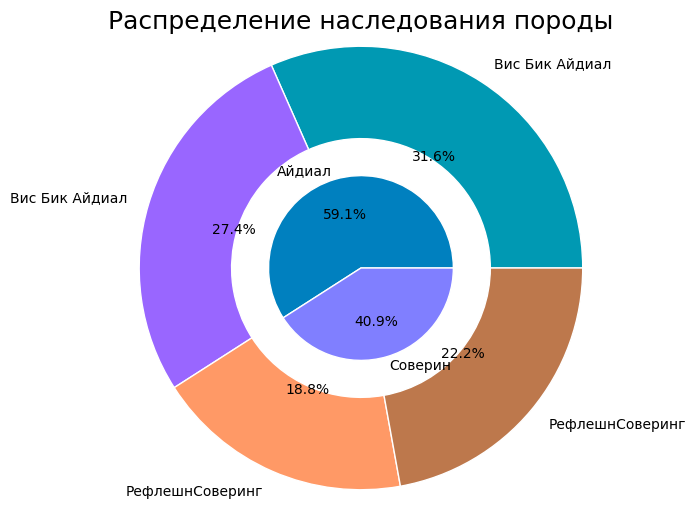

In [40]:
a,b,c,d,e,f,g,h,i = [plt.cm.winter, plt.cm.cool, plt.cm.spring, plt.cm.copper, plt.cm.bone,\
                     plt.cm.gist_heat, plt.cm.pink, plt.cm.summer, plt.cm.autumn]
outer_colors = [a(.6), b(.6), c(.6), d(.6), e(.6), f(.6), g(.6), h(.6), i(.6)]
inner_colors = [a(.5), b(.5), c(.5), d(.5), e(.5), f(.5), g(.5), h(.7),i(.7)]

labels2 = poroda_cow_buy['порода'].tolist()
labels = pd.unique(poroda_cow_buy['порода_папы_быка'].values.ravel())
size = 0.5
vals = ferma_main.groupby('порода')['эке'].count()
group_sum = poroda_cow_buy['всего']

fig, ax = plt.subplots(figsize=(10,6))
ax.pie(group_sum,
       radius = 1.2,
       colors = outer_colors,
       labels = labels2,
       autopct="%.1f%%",
       wedgeprops = dict(width=size, edgecolor='w'))

ax.pie(vals,
       radius = 1-size, # size=0.3
       colors = inner_colors,
       labels = labels,
       autopct="%.1f%%",
       wedgeprops = dict(width=size, edgecolor='w'))

ax.set_title('Распределение наследования породы', fontsize=18);

<font color='blue'> <h3>3.2.2. 'возраст' — распределение возраста коров.

In [41]:
# Выполним статистический анализ категориальных признаков в базе ferma_main - о стаде фермера на текущий момент
poroda_age = ferma_main[['порода', 'возраст']]
poroda_age = poroda_age.groupby(['порода', 'возраст']).size().sort_values(ascending=False).reset_index()
poroda_age.columns = ['порода', 'возраст', 'всего']
poroda_age

порода      возраст  всего
0   Вис Бик Айдиал  более_2_лет    297
1  РефлешнСоверинг  более_2_лет    217
2   Вис Бик Айдиал  менее_2_лет     71
3  РефлешнСоверинг  менее_2_лет     38

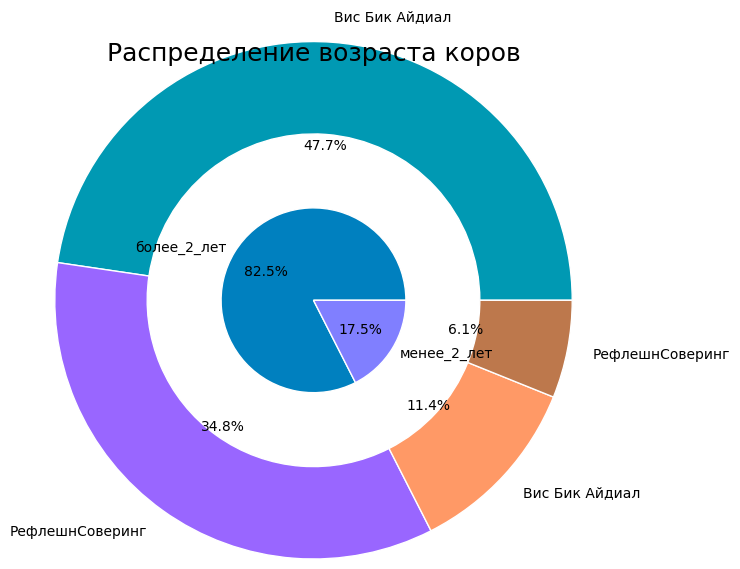

In [42]:
labels = poroda_age['порода'].tolist()
labels2 = pd.unique(poroda_age['возраст'].values.ravel())
size = 0.5
vals = poroda_age['всего']
group_sum = poroda_age.groupby('возраст')['всего'].sum()

fig, ax = plt.subplots(figsize=(14,6))
ax.pie(vals,
       radius = 1.4,
       colors = outer_colors,
       labels = labels,
       autopct="%.1f%%",
       wedgeprops = dict(width=size, edgecolor='w'))

ax.pie(group_sum,
       radius = 1-size,
       colors = inner_colors,
       labels = labels2,
       autopct="%.1f%%",
       wedgeprops = dict(width=size, edgecolor='w'))

ax.set_title('Распределение возраста коров', fontsize=18);

<font color='blue'> <h3>3.2.3. 'Тип пастбища' — распределение коров по пастбищам.

In [43]:
# Выполним статистический анализ категориальных признаков в базе ferma_main - о стаде фермера на текущий момент
# Распределение коров по пастбищам
poroda_pasture = ferma_main[['порода', 'тип_пастбища']]
poroda_pasture = poroda_pasture.groupby(['порода', 'тип_пастбища']).size().sort_values().reset_index()
poroda_pasture.columns = ['порода', 'тип_пастбища', 'всего']
poroda_pasture

порода тип_пастбища  всего
0  РефлешнСоверинг    равнинное     91
1  РефлешнСоверинг    холмистое    164
2   Вис Бик Айдиал    равнинное    184
3   Вис Бик Айдиал    холмистое    184

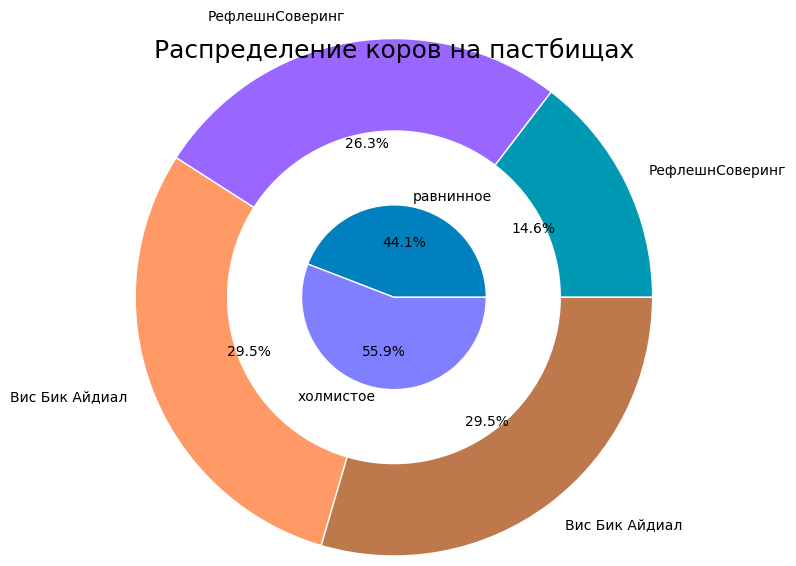

In [44]:
labels = poroda_pasture['порода'].tolist()
labels2 = pd.unique(poroda_pasture['тип_пастбища'].values.ravel())
size = 0.5
vals = poroda_pasture['всего']
group_sum = poroda_pasture.groupby('тип_пастбища')['всего'].sum()

fig, ax = plt.subplots(figsize=(14,6))
ax.pie(vals,
       radius = 1.4,
       colors = outer_colors,
       labels = labels,
       autopct="%.1f%%",
       wedgeprops = dict(width=size, edgecolor='w'))

ax.pie(group_sum,
       radius = 1-size,
       colors = inner_colors,
       labels = labels2,
       autopct="%.1f%%",
       wedgeprops = dict(width=size, edgecolor='w'))

ax.set_title('Распределение коров на пастбищах', fontsize=18);

In [45]:
# Выполним статистический анализ категориальных признаков в базе ferma_main - о стаде фермера на текущий момент
# Распределение вкуса молока относительно породы коров
poroda_taste = ferma_main[['порода', 'вкус_молока']]
poroda_taste = poroda_taste.groupby(['порода', 'вкус_молока']).size().sort_values(ascending=False).reset_index()
poroda_taste.columns = ['порода', 'вкус_молока', 'всего']
poroda_taste

порода вкус_молока  всего
0   Вис Бик Айдиал      вкусно    215
1   Вис Бик Айдиал   не вкусно    153
2  РефлешнСоверинг      вкусно    151
3  РефлешнСоверинг   не вкусно    104

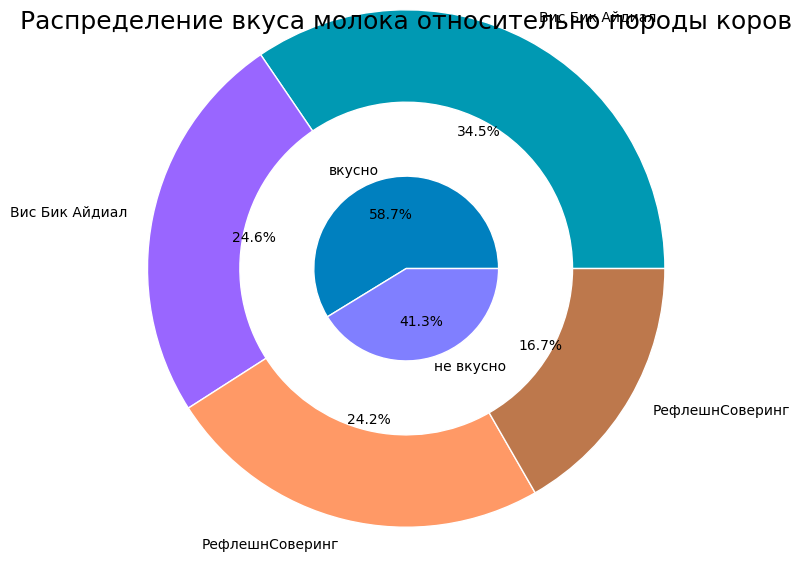

In [46]:
labels = poroda_taste['порода'].tolist()
labels2 = pd.unique(poroda_taste['вкус_молока'].values.ravel())
size = 0.5
vals = poroda_taste['всего']
group_sum = poroda_taste.groupby('вкус_молока')['всего'].sum()

fig, ax = plt.subplots(figsize=(14,6))
ax.pie(vals,
       radius = 1.4,
       colors = outer_colors,
       labels = labels,
       autopct="%.1f%%",
       wedgeprops = dict(width=size, edgecolor='w'))

ax.pie(group_sum,
       radius = 1-size,
       colors = inner_colors,
       labels = labels2,
       autopct="%.1f%%",
       wedgeprops = dict(width=size, edgecolor='w'))

ax.set_title('Распределение вкуса молока относительно породы коров', fontsize=18);

Очевидной зависимости вкуса от породы не наблюдается. В среднем 60% коров дают вкусное молоко, остальные невкусное.

<font color='blue'> <h1>4. Корреляционный анализ

1.	Изучим взаимосвязь между признаками: рассчитаем коэффициенты корреляции между всеми признаками.<br>
2.	Построим диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков. <br>
<br>
Пример: диаграмма рассеяния для Удой, кг и Сырой протеин, г, цвет точек диаграммы отображает признак Порода. <br>
Учтём, что виды связи в подгруппах могут различаться — например, для разных пород.<br>
<br>
3.	Сделаем выводы о взаимосвязи признаков: <br>
·	Какой тип взаимосвязи между целевым и входными признаками?<br>
·	Есть ли нелинейные связи между целевым и входными признаками? <br>
·	Нужно ли вводить в модель дополнительные признаки, чтобы это учесть?<br>
·	Наблюдается ли мультиколлинеарность между входными признаками?<br>


<font color='blue'> <h2> 4.1. Коэффициенты корреляции признаков

In [47]:
# корреляция данных, рассчитанная методом ferma_main.corr() выведет зависимости только цифровых данных,
# а нам нужно узнать зависимости между цифровыми и категориальными данными,
# поэтому используем рассчёт корреляция средствами библиотеки phik
ferma_main.phik_matrix()

interval columns not set, guessing: ['id', 'удой_кг', 'эке', 'протеин_г', 'спо', 'жирность,%', 'белок,%']


id   удой_кг       эке  протеин_г       спо    порода  \
id                1.000000  0.000000  0.000000   0.113668  0.382619  0.613572   
удой_кг           0.000000  1.000000  0.720303   0.466145  0.661352  0.162958   
эке               0.000000  0.720303  1.000000   0.451619  0.591611  0.115077   
протеин_г         0.113668  0.466145  0.451619   1.000000  0.387949  0.085472   
спо               0.382619  0.661352  0.591611   0.387949  1.000000  0.052108   
порода            0.613572  0.162958  0.115077   0.085472  0.052108  1.000000   
тип_пастбища      0.000000  0.274778  0.103464   0.084767  0.145166  0.206840   
порода_папы_быка  0.319636  0.518814  0.173375   0.000000  0.427383  0.093854   
жирность,%        0.524392  0.707631  0.717536   0.403626  0.643040  0.222665   
белок,%           0.000000  0.233484  0.000000   0.225745  0.000000  0.375280   
вкус_молока       0.061064  0.173285  0.273181   0.173276  0.572829  0.000000   
возраст           0.000000  0.998067  0.772487   0.348442  0.748693  0.053406   

                  тип_пастбища  порода_папы_быка  жирность,%   белок,%  \
id                    0.000000          0.319636    0.524392  0.000000   
удой_кг               0.274778          0.518814    0.707631  0.233484   
эке                   0.103464          0.173375    0.717536  0.000000   
протеин_г             0.084767          0.000000    0.403626  0.225745   
спо                   0.145166          0.427383    0.643040  0.000000   
порода                0.206840          0.093854    0.222665  0.375280   
тип_пастбища          1.000000          0.000000    0.000000  0.149085   
порода_папы_быка      0.000000          1.000000    0.000000  0.078668   
жирность,%            0.000000          0.000000    1.000000  0.000000   
белок,%               0.149085          0.078668    0.000000  1.000000   
вкус_молока           0.268762          0.000000    0.201406  0.107450   
возраст               0.123505          0.351328    0.682940  0.000000   

                  вкус_молока   возраст  
id                   0.061064  0.000000  
удой_кг              0.173285  0.998067  
эке                  0.273181  0.772487  
протеин_г            0.173276  0.348442  
спо                  0.572829  0.748693  
порода               0.000000  0.053406  
тип_пастбища         0.268762  0.123505  
порода_папы_быка     0.000000  0.351328  
жирность,%           0.201406  0.682940  
белок,%              0.107450  0.000000  
вкус_молока          1.000000  0.156310  
возраст              0.156310  1.000000

Изучим корреляцию входных признаков и целевых данных: вкус молока, удои

In [48]:
# Построим тепловую карту корреляции цифровых данных и категориальных данных
ferma_main.phik_matrix(interval_cols=['id', 'удой_кг', 'эке', 'протеин_г', 'спо', 'жирность,%', 'белок,%'])\
                    .style.background_gradient(cmap='coolwarm')

Согласно шкале Чеддока:<br>
Слабая 0.1–0.3; Умеренная 0.3–0.5; Заметная 0.5–0.7; Высокая 0.7–0.9; Весьма высокая 0.9–1<br>
Тёмные тона говорят о сильной линейной зависимости, а светлые — о слабой.<br>
<br>
Заметная и высокая корреляции между:<br>
вкусом молока - спо (0.57);<br>
Удоями и эке (0,72), спо (0,66), жирность (0,71), порода папы быка (0,52), возраст (0,99)<br>
<br>
Точный тип зависимости будет виден на диаграмме рассеяния. <br>

Высокая мультиколлинеарность между параметрами "удой" и "спо" - 0,79<br>
<br>
Как правило, о мультиколлинеарности говорят при значении коэффициента корреляции от 0.9 до 0.95 по модулю. <br>
В такой ситуации лишние коррелирующие признаки нужно удалять из обучающей выборки. (Оставляем)<br>

У меня сложилось мнение (специально не буду смотреть на общепринятое), что "регресс" это описание процесса: на основании нескольких признаков предсказываем один - из линии высекаем точку, из плоскости линию, из объёма - плоскость и т.д. Снижение размерности из входящих признаков до искомого.

<font color='blue'> <h2> 4.2. Диаграммы рассеяния

Построим диаграммы рассеяния scatterplot категориальных признаков

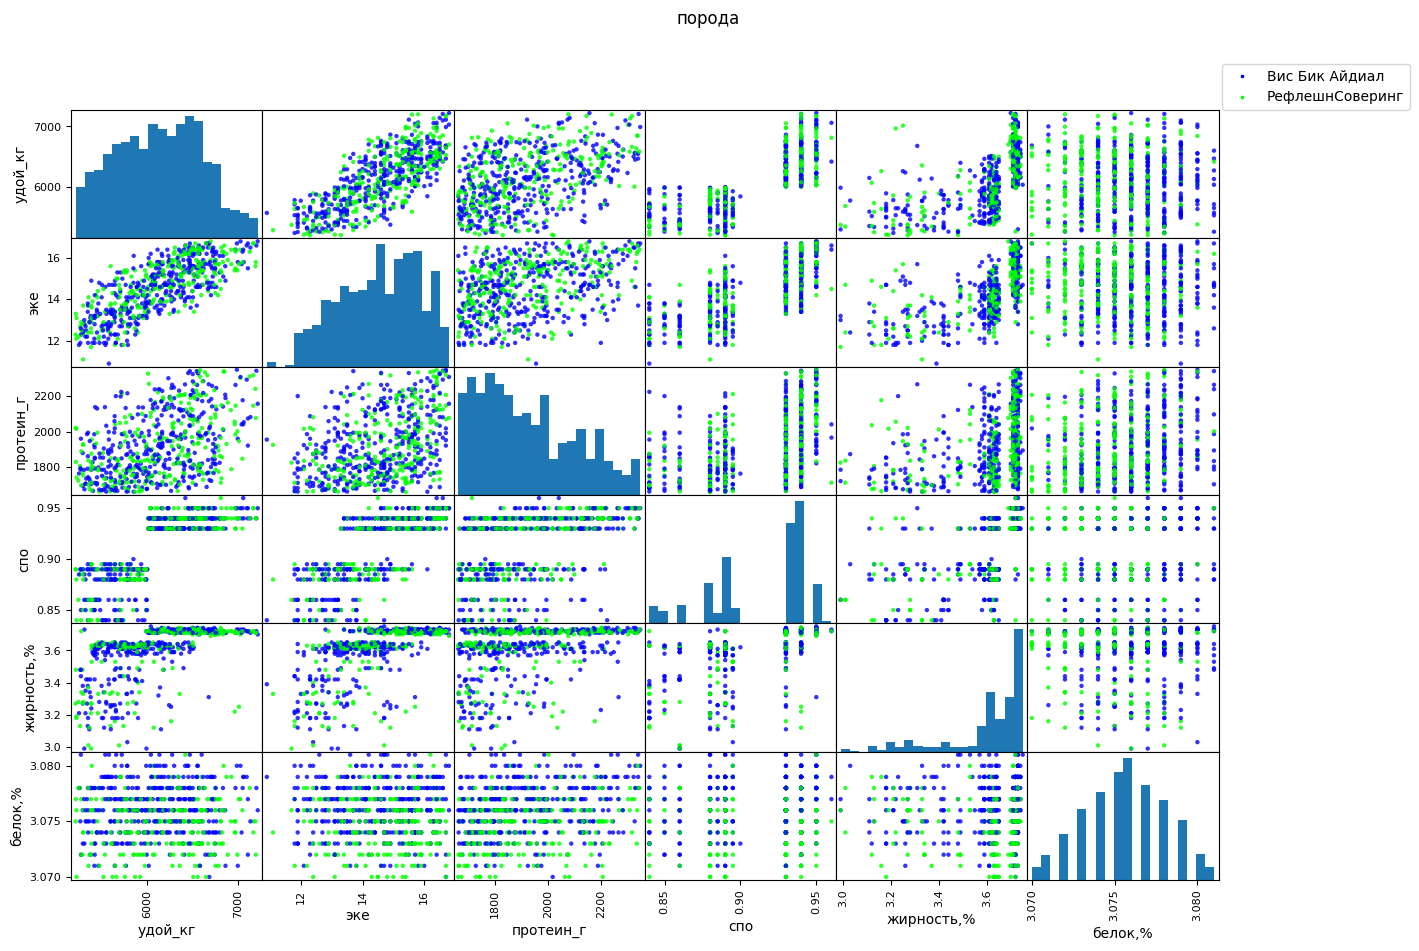

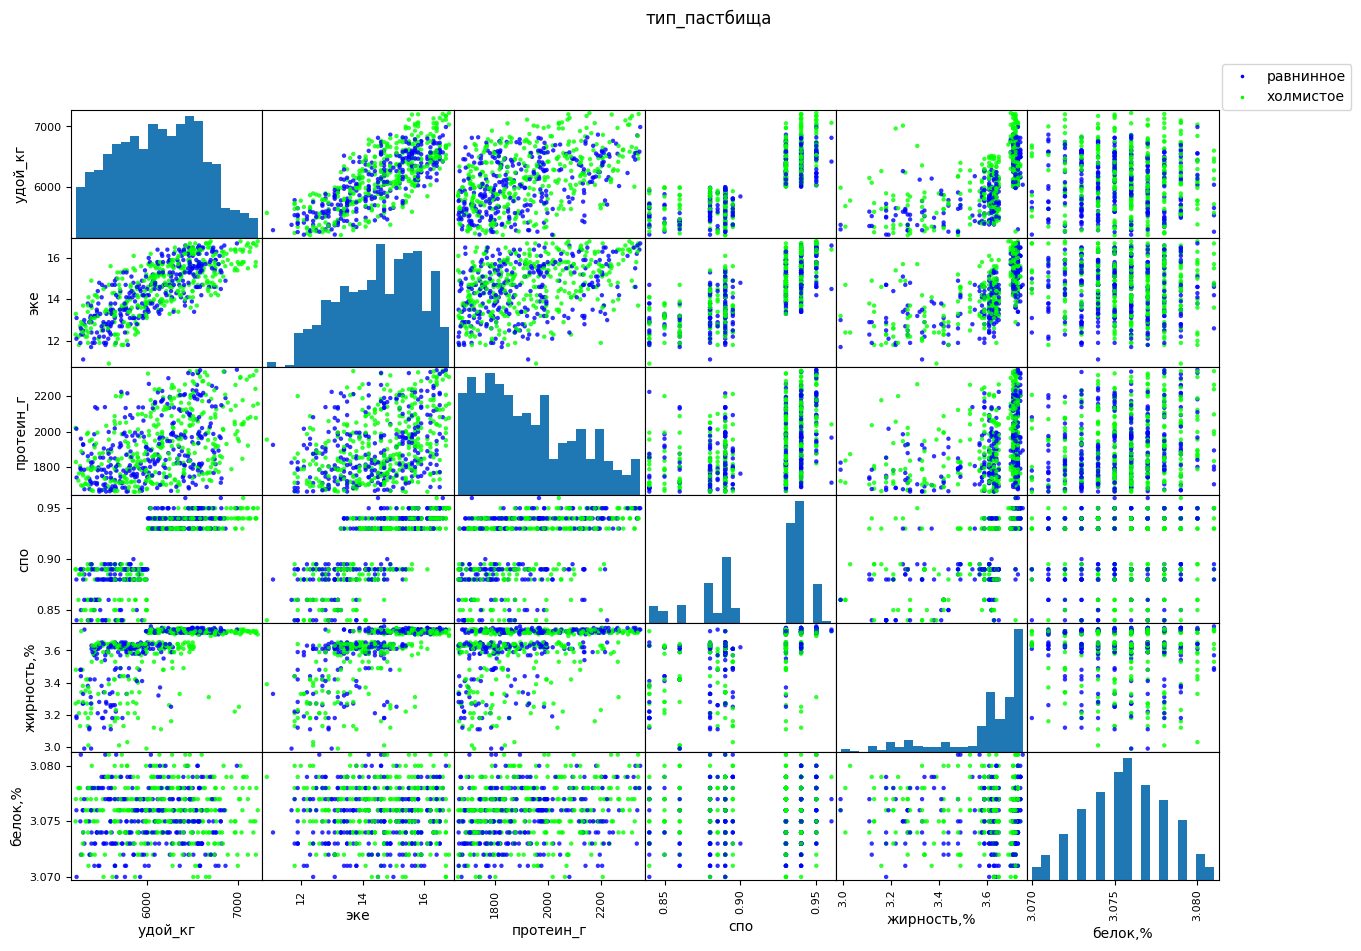

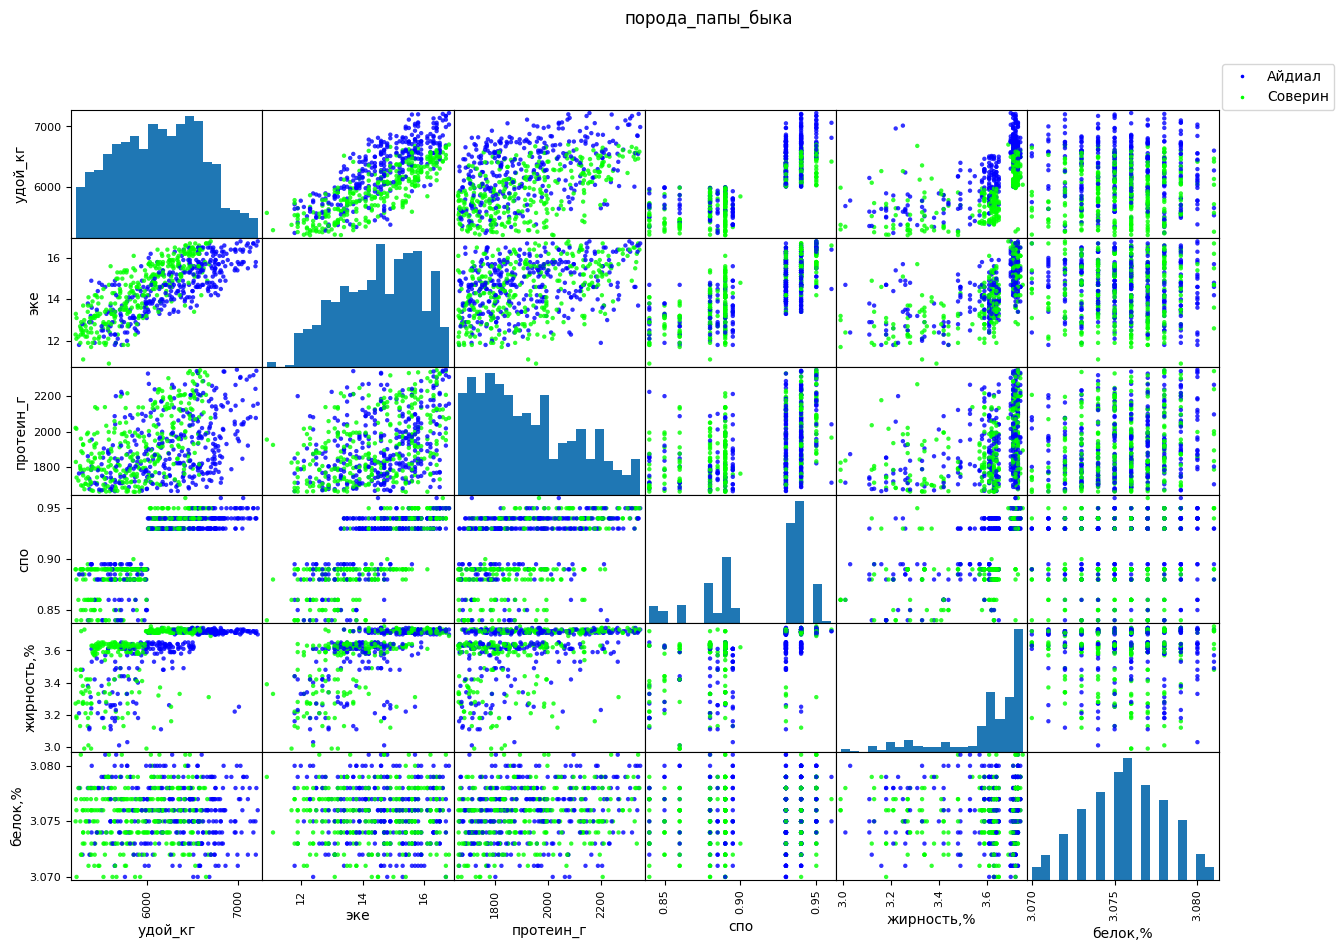

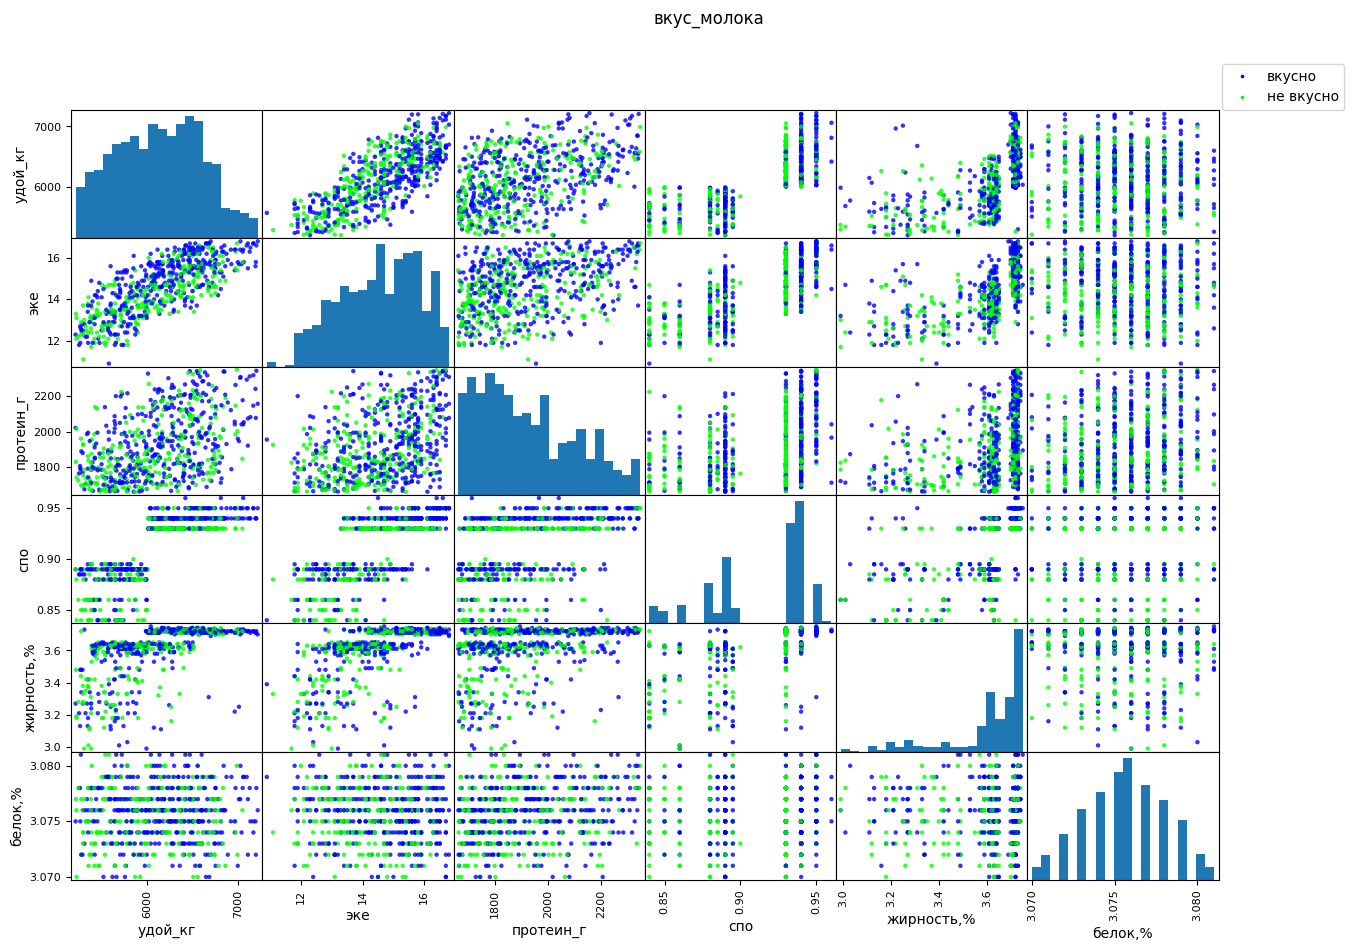

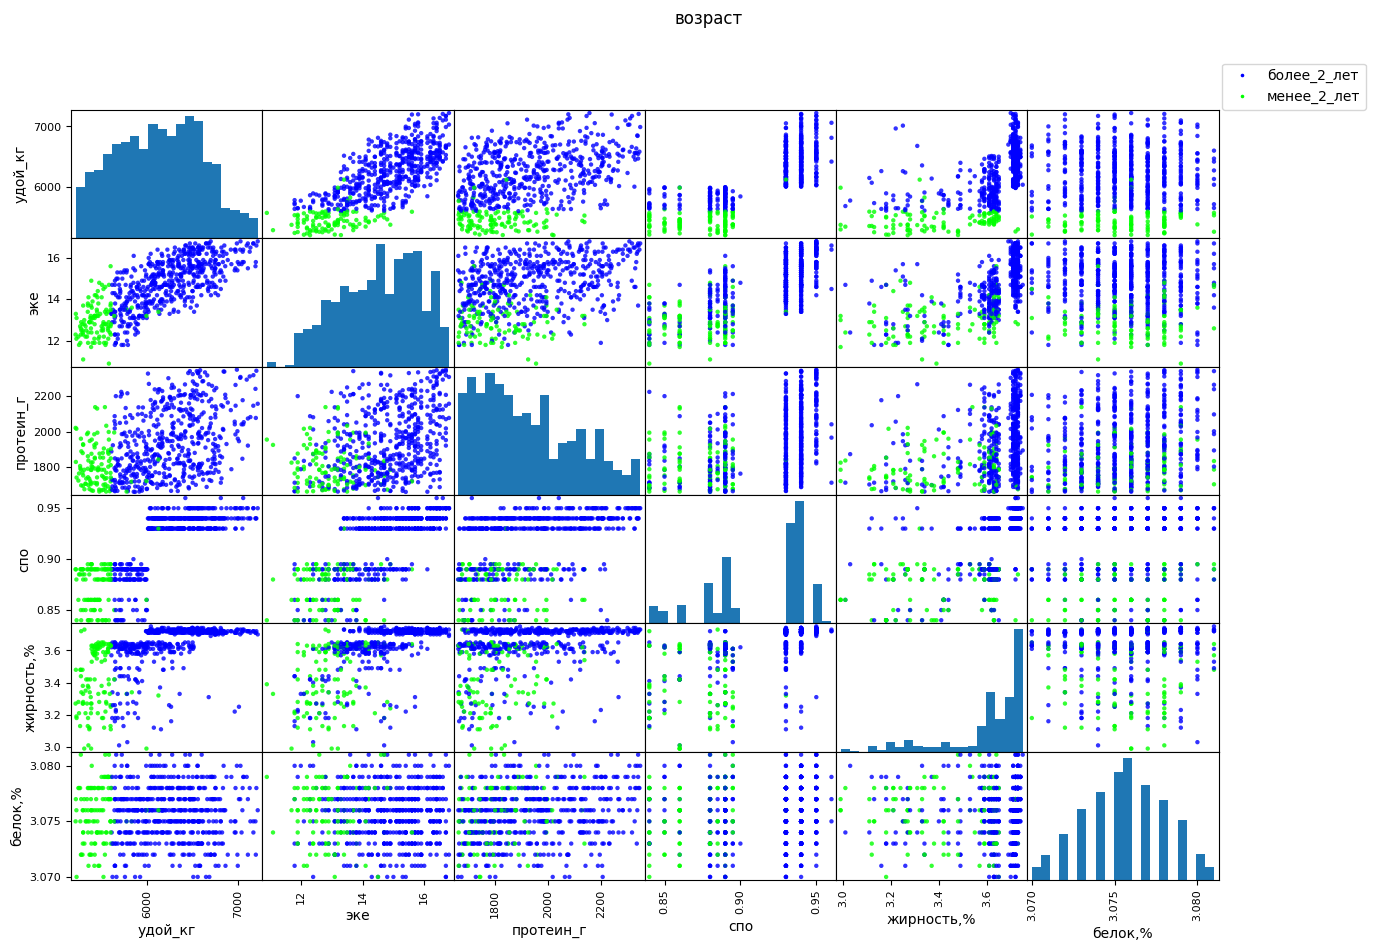

In [49]:
def other_figure(categories):

    # Список уникальных териминов в категорильном значении, относительно которых будут сравниваться дисперсии
    list_term = ferma_main[categories].unique()

    ferma_main_categories = ferma_main.iloc[:,1:12]
    ferma_main_categories.loc[ferma_main[categories] == list_term[0], categories] = 0
    ferma_main_categories.loc[ferma_main[categories] == list_term[1], categories] = 1


    plt.rcParams["figure.subplot.right"] = 0.8
    grr = scatter_matrix(
        ferma_main_categories, c=ferma_main_categories[categories], figsize=(17,10),
        marker='.2', hist_kwds={'bins':20}, s=10, alpha=.8, cmap='brg'
                        )

    handles = [plt.plot([],[],color=plt.cm.brg(i/1.), ls="", marker=".", \
                        markersize=np.sqrt(10))[0] for i in range(2)]
    labels=[list_term[0], list_term[1]]
    plt.legend(handles, labels, loc=(1.02,6))
    plt.suptitle(categories)
    plt.show()

# Список названий столбцов имеющих категориальные признаки
list_categories = [column for column in ferma_main.columns if ferma_main[column].dtype == 'object']

# С помощью цикла выведем все графики
for categories in list_categories:
    other_figure(categories)

<font color='blue'> <h2> 4.3. Выводы о взаимосвязи признаков

Сделаем выводы о взаимосвязи признаков:<br>
· Какой тип взаимосвязи между целевым и входными признаками?<br>
· Есть ли нелинейные связи между целевым и входными признаками?<br>
· Нужно ли вводить в модель дополнительные признаки, чтобы это учесть?<br>
· Наблюдается ли мультиколлинеарность между входными признаками?<br>

<b>1. С помощью корреляции и графиков рассения мы выяснили:<br></b>
<br>
<b>между целевым признаком удой и входными признаками наблюдаются следующие типы связей:<br></b>
Слабая	0.1–0.3 : вкус молока, порода, тип пастбища, белок<br>
Умеренная	0.3–0.5 : протеин<br>
Заметная	0.5–0.7 : СПО, порода папы, жирность<br>
Высокая	0.7–0.9 : Эке<br>
Весьма высокая	0.9–1 : возраст<br>
<br>
<b>между целевым признаком удой и входными признаками наблюдаются следующие типы связей:<br></b>
Нет связи с породой коровы и породой папы<br>
Слабая	0.1–0.3 : удой, эке, протеин, тип пастбища, жирность, белок, возраст<br>
Умеренная	0.3–0.5 : <br>
Заметная	0.5–0.7 : СПО<br>
Высокая	0.7–0.9 : <br>
Весьма высокая	0.9–1 : <br>
<br>
<b>2. Есть ли нелинейные связи между целевым и входными признаками<br></b>
Нелинейная связь наблюдается (по два кластера) в признаках "спо" и "жирность"<br>
<br>
<b>3 Нужно ли вводить в модель дополнительные признаки, чтобы это учесть?<br></b>
Можно сделать дополнительные признаки: "спо_0.85_0.9" и "спо_0.9_0.95"; "жирность_3.5_3.65" и "жирность_3.65_3.8"<br>
<br>
<b>4 Мультиколлинеарность между входными признаками?</b><br>
Высокая мультиколлинеарность между параметрами "удой" и "спо" - 0,67; "жирность" и "спо"- 0,68<br>
Как правило, о мультиколлинеарности говорят при значении коэффициента корреляции от 0.9 до 0.95 по модулю.<br>
В такой ситуации лишние коррелирующие признаки нужно удалять из обучающей выборки. (Оставляем)<br>

      R2 LinearRegression для эке_кв = 0.5857        R2 LinearRegression для эке = 0.5852
      Изменение коэффициента детерминации R² при возведение значений эке в квадрат изменилось на 0.08%


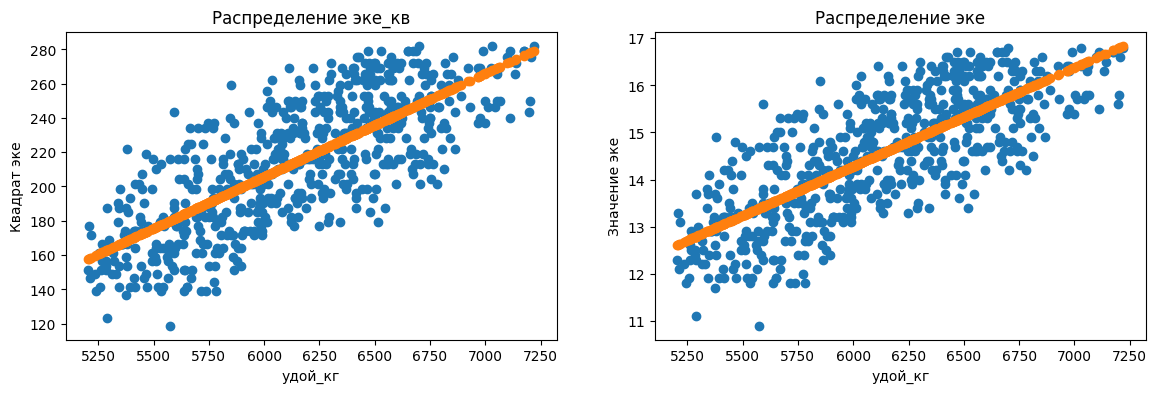

In [50]:
#  Построим scatter plot для эке в квадрате и наложим прямую регрессии с вычислением r2
numeric_list2 = ['эке']
def boxplot_hist_figure(categories2):

    fig, axes = plt.subplots(1, 2, figsize=(16, 4))

    Eke = ferma_main[categories2]
    Eke_2 = ferma_main[categories2]**2
    Udoy = ferma_main[['удой_кг']]

    # инициализируем модели линейной регрессии
    model_lr0_1 = LinearRegression()
    model_lr0_2 = LinearRegression()

    # обучим модель на тренировочных данных
    model_lr0_1.fit(Udoy, Eke)
    model_lr0_2.fit(Udoy, Eke_2)

    # сохраним результат в переменную
    Eke_line = model_lr0_1.predict(Udoy)
    Eke_line2 = model_lr0_2.predict(Udoy)

    axes[0].scatter(Udoy, Eke_2)
    axes[0].scatter(Udoy, Eke_line2)
    axes[0].set_xlabel('удой_кг')
    axes[0].set_ylabel("Квадрат " +str(categories2))
    axes[0].set_title("Распределение эке_кв");

    axes[1].scatter(Udoy, Eke)
    axes[1].scatter(Udoy, Eke_line)
    axes[1].set_xlabel('удой_кг')
    axes[1].set_ylabel("Значение " +str(categories2))
    axes[1].set_title("Распределение эке");

# Список названий столбцов имеющих числовые признаки
    r0_1 = r2_score(Eke, Eke_line)
    r0_2 = r2_score(Eke_2, Eke_line2)
    r_procent = (1-r0_1 / r0_2)*100
    print( f"      R2 LinearRegression для эке_кв = {r0_2:.4f}", f"       R2 LinearRegression для эке = {r0_1:.4f}")
    print( f"      Изменение коэффициента детерминации R² при возведение значений эке в квадрат изменилось на {r_procent:.2f}%")

# С помощью цикла выведем все графики
for categories2 in numeric_list2:
    boxplot_hist_figure(categories2)


Отлично, видим что после возведения эке в квадрат, прямая чуть-чуть лучше описывает множество точек. Значит действительно больше похожа на квадратичную зависимость


Отличие средней ошибки предсказания от дисперсии целевого признака MSE/D для изменённых данных (при возведении в квадрат признака) становится меньше (R2 = 1 - MSE/D). Что довольно незначительно влияет на коэффициент детерминации R².

<font color='blue'> <h1>5. Задача регрессии

Обучим три модели простой линейной регрессии.<br>
<br>
1. Подготовим данные датасета ferma_main.csv и обучим на них первую модель LinearRegression. <br>
·	Используем в качестве целевого признак Удой, кг.<br>
·	Отберём признаки, которые подходят для модели линейной регрессии, аргументируем выбор. Будем опираться не только на наличие или отсутствие линейной связи между признаками, но и на причинно-следственные связи между удоем коров и группами признаков из описания датасета.<br>
·	Разобъём данные на тренировочную и тестовую выборки.<br>
·	Кодируем категориальные признаки с помощью OneHotEncoder.<br>
·	Масштабируем количественные признаки с помощью StandardScaler.<br>
·	Обучим модель линейной регрессии на подготовленных данных.<br>
·	Оценим качество модели на тестовой выборке: рассчитаем R², проанализируем остатки с помощью графиков.<br>
·	Оформим выводы, укажем: <br>
·	значение R² модели;<br>
·	какие выводы следуют из анализа остатков;<br>
·	нужны ли дополнительные исследования.<br>
<br>
2. Подготовьте данные с учётом связи входных признаков с целевым и обучите на них вторую модель LinearRegression. <br>
·	Посмотрите на диаграммы рассеяния: на них можно увидеть, что некоторые входные признаки связаны с целевым нелинейно. Исключите нелинейность, чтобы эти признаки были информативны для линейной регрессии. Вот несколько способов, которыми это можно сделать: <br>
·	Вы обнаружите, что СПО и Удой связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение СПО, которое можно считать границей между кластерами. Чтобы устранить нелинейность, преобразуйте СПО в категориальный бинарный признак, использовав эту границу.<br>
·	Вы обнаружите, что ЭКЕ и Удой также связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак ЭКЕ в квадрате.<br>
·	Повторите шаги из пункта 1 и создайте вторую модель: подготовьте данные, обучите модель, оцените её качество и напишите выводы.<br>
<br>
3. Добавьте в данные новый признак и обучите на них третью модель LinearRegression. <br>
·	Добавьте признак Имя Папы из файла ferma_dad.csv, соединив его с остальными данными ferma_main.csv по ключу.<br>
·	Устраните нелинейность между признаками.<br>
·	Повторите шаги из пункта 1 и создайте третью модель: подготовьте данные, обучите модель, оцените её качество и напишите выводы.<br>
<br>
4. Сравните качество трёх моделей линейной регрессии, сопоставьте их R² и остатки.<br>
<br>
5. Оцените качество каждой модели по трём метрикам: MSE, MAE, RMSE. Используйте функции для расчёта метрик. Укажите: <br>
·	лучшую модель;<br>
·	доверительный интервал прогноза лучшей модели.<br>
<br>
6. С помощью лучшей модели спрогнозируйте удой коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv. <br>
·	Добавьте недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение): возьмите из датасета ferma_main.csv средние значения каждого из признаков и увеличьте их на 5%.<br>
·	Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки.<br>
·	Получите прогноз удоя коров.<br>


<font color='blue'> <h2> 5.1. Первая модель LinearRegression

Подготовим данные датасета ferma_main.csv и обучим на них первую модель LinearRegression.

<font color='blue'> <h3>5.1.1. Разбивка подготовленных данных на тренировочную и тестовую выборки

In [51]:
# Выведем названия колонок в двух базах и сравним их
columns_ferma_main = ferma_main.columns.tolist()
columns_cow_buy = cow_buy.columns.tolist()

print(columns_ferma_main)
print(columns_cow_buy)

['id', 'удой_кг', 'эке', 'протеин_г', 'спо', 'порода', 'тип_пастбища', 'порода_папы_быка', 'жирность,%', 'белок,%', 'вкус_молока', 'возраст']
['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'текущая_жирность,%', 'текущий_уровень_белок,%', 'возраст']


Целевой признак - Удой, кг.<br>

Отберём признаки, которые подходят для модели линейной регрессии, аргументируем выбор. Будем опираться не только на наличие или отсутствие линейной связи между признаками, но и на причинно-следственные связи между удоем коров и группами признаков из описания датасета.<br>
<br>
ferma_main.csv :<br>
· ЭКЕ — показатель питательности корма коровы : 0,72 - V<br>
· СПО - сахаро-протеиновое соотношение : 0,67 - V<br>
· Порода коровы : 0,14 - V<br>
· Сырой протеин, г  : 0,39 - V<br>
· Тип пастбища — ландшафт лугов : 0,27 - V<br>
· порода папы коровы : 0,58 - V<br>
· Жирность,% — содержание жиров в молоке: 0,68 - не влияет на удои (является производным признаком)<br>
· Белок,% — содержание белков в молоке : 0,0 - не влияет на удои (является производным признаком)<br>
· Вкус молока — вкусно, не вкусно : 0,12 - не влияет на удои (является производным признаком)<br>
· Возраст коровы - менее 2 лет, более 2 лет: 1,0 - V ::: Так как показатель корреляции равен единице, учитывать не будем<br>
<br>
Эти же показатели должны быть в базе данных о коровах «ЭкоФермы» - cow_buy.csv, иначе невозможно будет выполнить предсказание,
поэтому для использованию полученной модели будем обогощать анализируемые данные<br>
cow_buy.csv :<br>
· Порода коровы : V<br>
· Тип пастбища — ландшафт лугов : V<br>
· порода папы коровы : V<br>
· Имя_папы — имя папы коровы : X (можно добавить в базу - ferma_main.csv)<br>
· Текущая_жирность,% — содержание жиров в молоке : X (нужно будет совместить названия...).<br>
· Текущий_уровень_белок,% — содержание белков в молоке : X (нужно будет совместить названия...).<br>
· Возраст коровы — менее 2 лет, более 2 лет : V<br>
<br>

In [52]:
# Составим такой список:
columns_ferma = ['эке', 'протеин_г', 'спо', 'тип_пастбища', 'порода_папы_быка', 'порода', 'возраст']

# Разобъём данные на тренировочную и тестовую выборки.<br>
# В качестве целевой переменной используем параметр "удой_кг".
# Сохраним во входных переменных данные по списку columns_ferma

X1 = ferma_main[columns_ferma]
y1 = ferma_main['удой_кг']

# создание константы RANDOM_STATE
RANDOM_STATE = 42

# разделение на тренировочную и тестовую выборки
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1,
    y1,
    test_size = 1/4,
    random_state=RANDOM_STATE
)
# выведем размерность получившихся частей датасета и убедимся, что разделение произошло правильно
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((467, 7), (156, 7), (467,), (156,))

<font color='blue'> <h3>5.1.2. Кодируем категориальные признаки с помощью OneHotEncoder.

In [53]:
# Выберем метод кодирования и выполним инициализацию. Кодируем категориальные признаки средствами sklearn
# Сохраним результаты кодирования добавив sparse=False.
# Удалим первый столбец при кодировании качественного признака, чтобы избежать дамми-ловушки
encoder1 = OneHotEncoder(drop='first', sparse=False)

# Разделим тренировочную выбоку на два списка с цифровыми и категориальными значениями.
# После преобразования данных соединим их

cat_col_names1 = ['тип_пастбища', 'порода_папы_быка', 'порода', 'возраст']
num_col_names1 = ['эке', 'протеин_г', 'спо']

# обучим кодированию и трансформируем категориальные признаки из тренировочной выборки
# сделаем это одной командой
X1_train_ohe = encoder1.fit_transform(X1_train[cat_col_names1])

# выполним преобразование категориальных признаков в тестовой выборке
X1_test_ohe = encoder1.transform(X1_test[cat_col_names1])

# сохраним в переменной encoder_col_names названия новых столбцов, ранее бывших категориальными
encoder_col_names1 = encoder1.get_feature_names_out()
encoder_col_names1

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array(['тип_пастбища_холмистое', 'порода_папы_быка_Соверин',
       'порода_РефлешнСоверинг', 'возраст_менее_2_лет'], dtype=object)

<font color='blue'> <h3>5.1.3. Отмасштабируем количественные признаки с помощью StandardScaler

In [54]:
# создадим переменную с экземпляром класса StandardScaler()
scaler1 = StandardScaler()

# обучим масштабированию и трансформируем количественные признаки из тренировочной выборки
# сделаем это одной командой
X1_train_scaled = scaler1.fit_transform(X1_train[num_col_names1])

# выполним преобразование количественных признаков в тестовой выборке
X1_test_scaled = scaler1.transform(X1_test[num_col_names1])

<font color='blue'> <h3>5.1.4. Объединим все преобразованные данные в тренировочный и тестовый датафреймы

In [55]:
# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажем из переменной encoder_col_names

X1_train_ohe = pd.DataFrame(X1_train_ohe, columns=encoder_col_names1)
X1_test_ohe = pd.DataFrame(X1_test_ohe, columns=encoder_col_names1)

X1_train_scaled = pd.DataFrame(X1_train_scaled, columns=num_col_names1)
X1_test_scaled = pd.DataFrame(X1_test_scaled, columns=num_col_names1)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X1_train = pd.concat([X1_train_ohe, X1_train_scaled], axis=1)
X1_test = pd.concat([X1_test_ohe, X1_test_scaled], axis=1)

# выведите пять первых строк из тренировочного датафрейма командой print()
print(X1_train.head())

   тип_пастбища_холмистое  порода_папы_быка_Соверин  порода_РефлешнСоверинг  \
0                     0.0                       1.0                     0.0   
1                     0.0                       0.0                     0.0   
2                     0.0                       0.0                     0.0   
3                     0.0                       0.0                     1.0   
4                     0.0                       0.0                     0.0   

   возраст_менее_2_лет       эке  протеин_г       спо  
0                  0.0  1.543027   0.206082  1.426018  
1                  0.0  1.388625  -0.185338  0.795084  
2                  0.0 -0.386997   0.265882 -0.782250  
3                  0.0 -0.927403  -0.832267 -1.097716  
4                  0.0  0.076209  -1.397651 -1.097716  


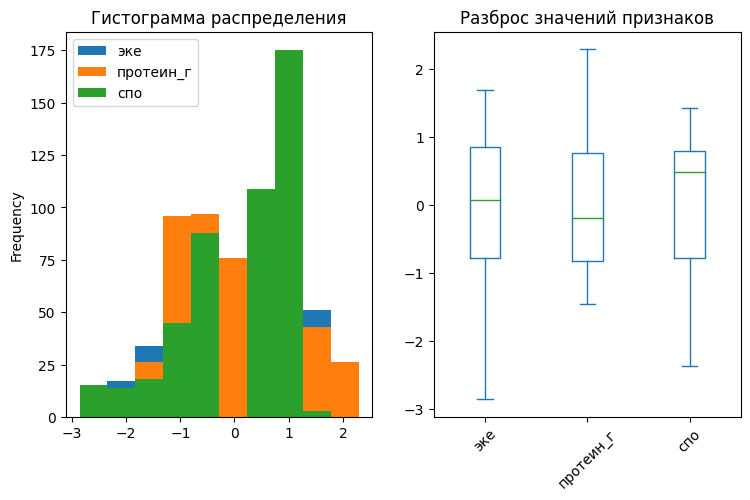

In [56]:
# построем графики по количественным признакам тренировочного датасета:
# гистограмму частотности распределения и ящик с усами.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X1_train[num_col_names1].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X1_train[num_col_names1].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

# Данные успешно отмасштабированы. Большая часть значений находится в промежутке [−3;2].

<font color='blue'> <h3>5.1.5. Обучим модель линейной регрессии на подготовленных данных

In [57]:
# инициализируем модель линейной регрессии
model_lr1 = LinearRegression()

# обучим модель на тренировочных данных
model_lr1.fit(X1_train, y1_train)

# получим предсказания модели на тестовых данных
# сохраним результат в переменную predictions
predictions1 = model_lr1.predict(X1_test)
print(predictions1[0:3])
print(y1_test[0:3])

[5847.44171106 5007.71614574 6723.77181369]
252    5754
564    5542
176    7141
Name: удой_кг, dtype: int64


<font color='blue'> <h3>5.1.6. Оценим качество модели

In [58]:
# Оценим качество модели на тестовой выборке: рассчитаем R².
r2_1 = r2_score(y1_test, predictions1)
f"R2 LinearRegression = {r2_1:.3f}"

'R2 LinearRegression = 0.783'

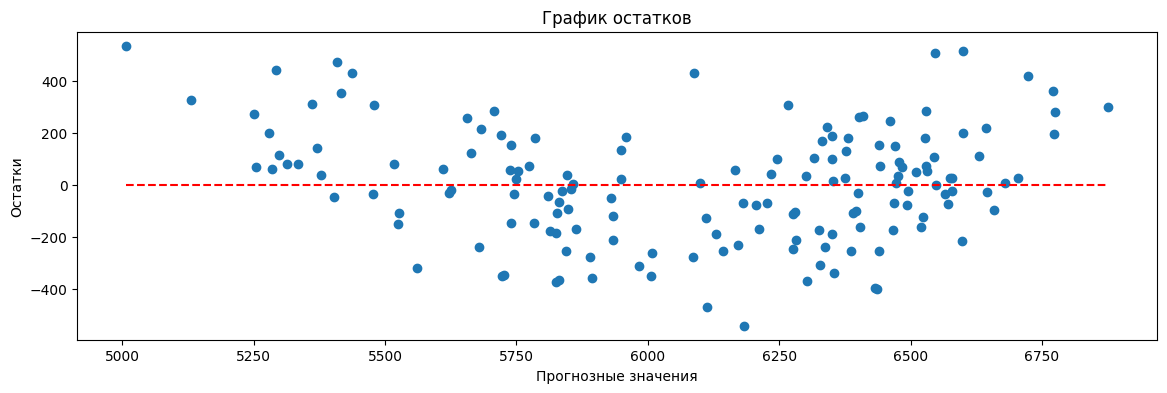

In [59]:
# Проанализируем остатки с помощью графиков.
# Для анализа остатков построим график, отображающий разницу между фактическими значениями целевой переменной
# и предсказанными значениями модели. Также добавим линию с нулевыми остатками.
plt.figure(figsize=(16, 4))
residuals1 = y1_test - predictions1
plt.scatter(predictions1, residuals1)
plt.plot([min(predictions1), max(predictions1)], [0, 0], color='red', linestyle='--')
plt.xlabel('Прогнозные значения')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.show()

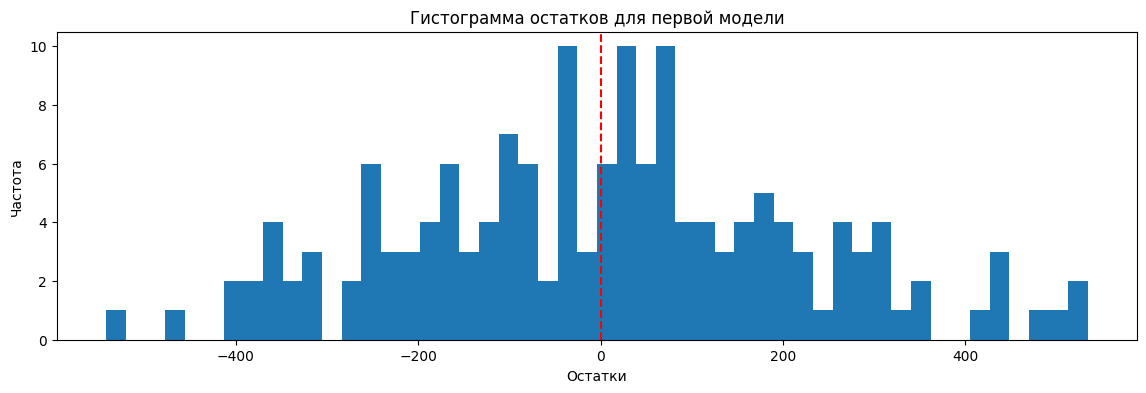

In [60]:
# Построим гистограмму остатков для первой модели
plt.figure(figsize=(16, 4))
plt.hist(residuals1, bins=50)
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.title('Гистограмма остатков для первой модели')
plt.show()

Выводы по работе первой модели:<br>
Гистограмма распределения остатков показывает равномерное распределение. Это говорит о том, что у модели стабильная ошибка на всех предсказаниях.<br>

<font color='blue'> <h2> 5.2. Вторая модель LinearRegression

Подготовим данные с учётом связи входных признаков с целевым. Обучим на них вторую модель LinearRegression.

<font color='blue'> <h3>5.2.1. Преобразование СПО в категориальный бинарный признак

На диаграммах рассеяния можно увидеть, что СПО и Удой связаны нелинейно. <br>
Исключим нелинейность, чтобы эти признаки были информативны для линейной регрессии. <br>
<br>
На их диаграмме рассеяния наблюдения сгруппированы в два кластера и есть такое значение СПО, которое можно считать границей между кластерами.
Чтобы устранить нелинейность, преобразуем СПО в категориальный бинарный признак, использовав эту границу.<br>
<br>
Уточним значение границы.<br>

In [61]:
ferma_main2 = ferma_main.copy()

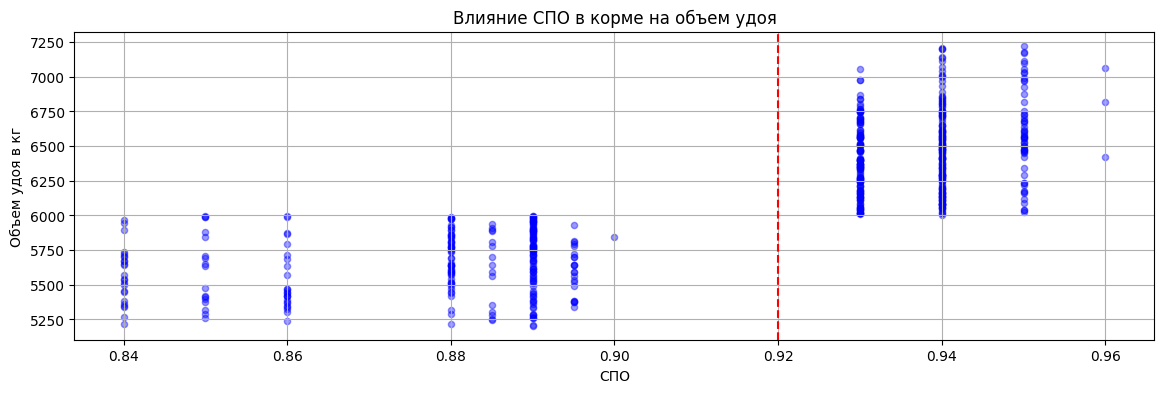

In [62]:
ferma_main2.plot(x ='спо', y='удой_кг', kind='scatter', figsize=(16,4), grid=True, color='blue', alpha = 0.4 )
plt.axvline(x=0.92, color='red', linestyle='--')
plt.xlabel('СПО')
plt.ylabel('Объем удоя в кг')
plt.title('Влияние СПО в корме на объем удоя')
plt.show()

# Видно, что граница раздела кластеров проходит по значению о,92 (отношение сахара к протеину в корме коровы)

In [63]:
# Создадим новый признак 'спо_би', который будет равен 1, если значение СПО больше границы, и 0, если меньше
spo_line = 0.92
ferma_main2['спо_би'] = np.where(ferma_main2['спо'] >= spo_line, 1, 0)

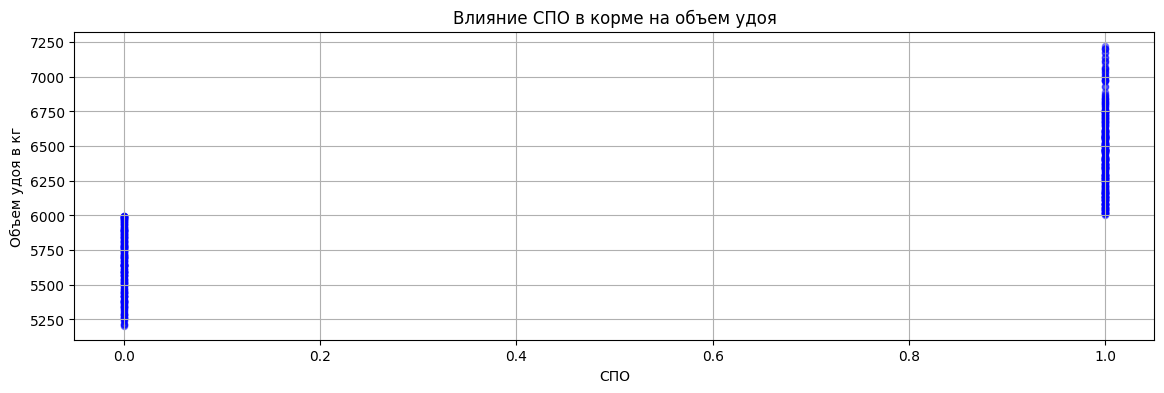

In [64]:
ferma_main2.plot(x ='спо_би', y='удой_кг', kind='scatter', figsize=(16,4), grid=True, color='blue', alpha = 0.4 )
plt.xlabel('СПО')
plt.ylabel('Объем удоя в кг')
plt.title('Влияние СПО в корме на объем удоя')
plt.show()

<font color='blue'> <h3>5.2.2. Преобразование ЭКЕ

Также на диаграммах рассеяния видно, что ЭКЕ и Удой тоже связаны нелинейно.
Чтобы исключить эту нелинейность введём новый признак ЭКЕ в квадрате, чтобы его коэффициенты при нормализации изменялись "быстрее", были ближе к показателям "удоев".

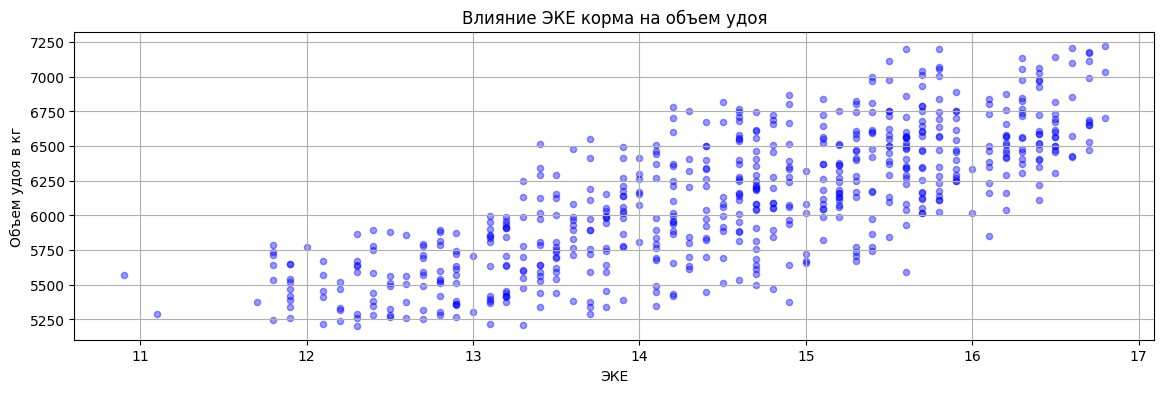

In [65]:
ferma_main2.plot(x ='эке', y='удой_кг', kind='scatter', figsize=(16,4), grid=True, color='blue', alpha = 0.4 )
plt.xlabel('ЭКЕ')
plt.ylabel('Объем удоя в кг')
plt.title('Влияние ЭКЕ корма на объем удоя')
plt.show()

In [66]:
# Введём новый признак ЭКЕ в квадрате
ferma_main2['эке_квадр'] = ferma_main2['эке']**2

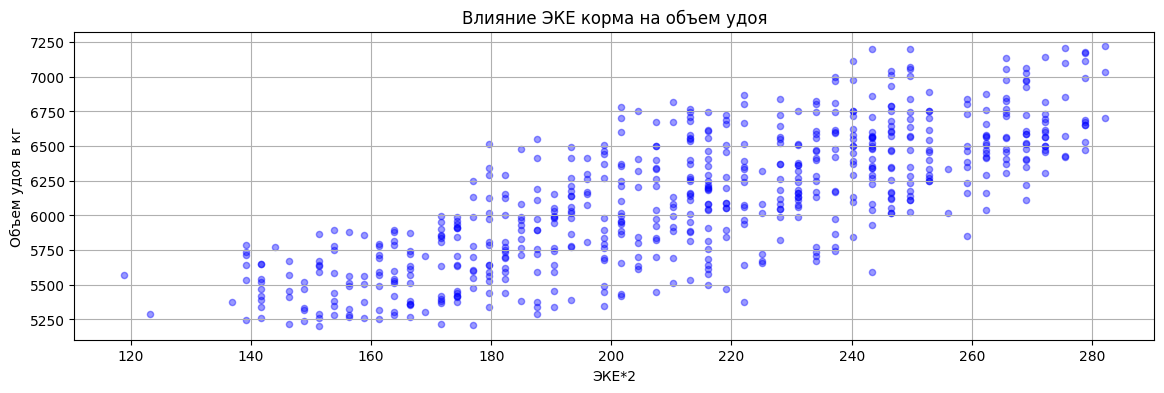

In [67]:
ferma_main2.plot(x ='эке_квадр', y='удой_кг', kind='scatter', figsize=(16,4), grid=True, color='blue', alpha = 0.4 )
plt.xlabel('ЭКЕ*2')
plt.ylabel('Объем удоя в кг')
plt.title('Влияние ЭКЕ корма на объем удоя')
plt.show()

<font color='blue'> <h3>5.2.3. Создание второй модели LinearRegression

Повторим шаги из пункта 5.1 и создадим вторую модель: подготовим данные, обучим модель, оценим её качество и напишем выводы.

In [68]:
# Сохраним во входных переменных данные по списку columns_ferma2
columns_ferma2 = ['эке_квадр', 'протеин_г', 'спо_би', 'тип_пастбища', 'порода_папы_быка', 'порода', 'возраст']

# Разобъём данные базы с оптимизированными признаками ferma_main2 на тренировочную и тестовую выборки.<br>
X2 = ferma_main2[columns_ferma2]

# В качестве целевой переменной используем параметр "удой_кг".
y2 = ferma_main2['удой_кг']

# создание константы RANDOM_STATE
RANDOM_STATE = 42

# разделение на тренировочную и тестовую выборки
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2,
    y2,
    test_size = 1/4,
    random_state=RANDOM_STATE
)

# Выберем метод кодирования и выполним инициализацию. Кодируем категориальные признаки средствами sklearn
# Сохраним результаты кодирования. Будем удалять первый столбец при кодировании качественного признака
encoder2 = OneHotEncoder(drop='first', sparse=False)

# Разделим тренировочную выбоку на два списка с цифровыми и категориальными значениями.
# После преобразования данных соединим их

cat_col_names2 = ['тип_пастбища', 'порода_папы_быка',  'порода', 'возраст']
num_col_names2 = ['эке_квадр', 'протеин_г', 'спо_би']

# обучим кодированию и сразу трансформируем категориальные признаки из тренировочной выборки
# сделаем это одной командой
X2_train_ohe = encoder2.fit_transform(X2_train[cat_col_names2])

# выполним преобразование категориальных признаков в тестовой выборке
X2_test_ohe = encoder2.transform(X2_test[cat_col_names2])

# сохраним в переменной encoder_col_names названия новых столбцов, ранее бывших категориальными
encoder_col_names2 = encoder2.get_feature_names_out()

# создадим переменную с экземпляром класса StandardScaler()
scaler2 = StandardScaler()

# обучим масштабированию и трансформируем количественные признаки из тренировочной выборки
# сделаем это одной командой
X2_train_scaled = scaler2.fit_transform(X2_train[num_col_names2])

# выполним преобразование количественных признаков в тестовой выборке
X2_test_scaled = scaler2.transform(X2_test[num_col_names2])

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажем из переменной encoder_col_names

X2_train_ohe = pd.DataFrame(X2_train_ohe, columns=encoder_col_names2)
X2_test_ohe = pd.DataFrame(X2_test_ohe, columns=encoder_col_names2)

X2_train_scaled = pd.DataFrame(X2_train_scaled, columns=num_col_names2)
X2_test_scaled = pd.DataFrame(X2_test_scaled, columns=num_col_names2)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X2_train = pd.concat([X2_train_ohe, X2_train_scaled], axis=1)
X2_test = pd.concat([X2_test_ohe, X2_test_scaled], axis=1)

# инициализируем модель линейной регрессии
model_lr2 = LinearRegression()

# обучим модель на тренировочных данных
model_lr2.fit(X2_train, y2_train)

# получим предсказания модели на тестовых данных
# сохраним результат в переменную predictions
predictions2 = model_lr2.predict(X2_test)
print(predictions2[0:3])
print(y2_test[0:3])

[5757.63422185 5215.26448191 6720.25696044]
252    5754
564    5542
176    7141
Name: удой_кг, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<font color='blue'> <h3>5.1.6. Оценим качество второй модели

In [69]:
# Оценим качество модели на тестовой выборке: рассчитаем R².
r2_2 = r2_score(y2_test, predictions2)
f"R2 LinearRegression = {r2_2:.3f}"

'R2 LinearRegression = 0.835'

In [70]:
# residuals2 = y2_test - predictions2
# plt.scatter(predictions2, residuals2)
# plt.plot([min(predictions2), max(predictions2)], [0, 0], color='red', linestyle='--')
# plt.xlabel('Предсказанные значения')
# plt.ylabel('Остатки')
# plt.title('График остатков')
# plt.show()

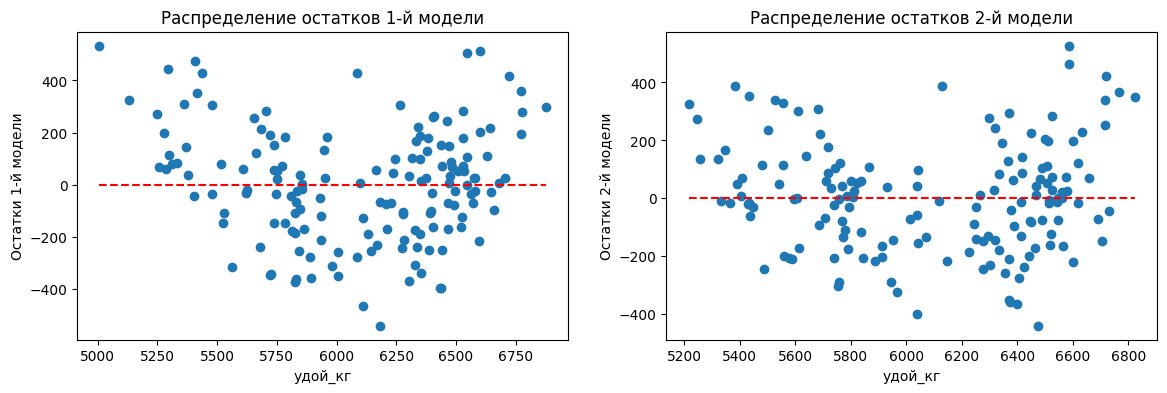

In [71]:
# Проанализируем остатки с помощью графиков.
# Для анализа остатков построим график, отображающий разницу между предсказанными значениями целевой переменной
# и предсказанными значениями модели. Также добавим линию с нулевыми остатками.

fig, axes = plt.subplots(1, 2, figsize=(16, 4))

residuals1 = y1_test - predictions1
axes[0].scatter(predictions1, residuals1)
axes[0].plot([min(predictions1), max(predictions1)], [0, 0], color='red', linestyle='--')
axes[0].set_xlabel('удой_кг')
axes[0].set_ylabel("Остатки 1-й модели")
axes[0].set_title("Распределение остатков 1-й модели");

residuals2 = y2_test - predictions2
axes[1].scatter(predictions2, residuals2)
axes[1].plot([min(predictions2), max(predictions2)], [0, 0], color='red', linestyle='--')
axes[1].set_xlabel('удой_кг')
axes[1].set_ylabel("Остатки 2-й модели")
axes[1].set_title("Распределение остатков 2-й модели");

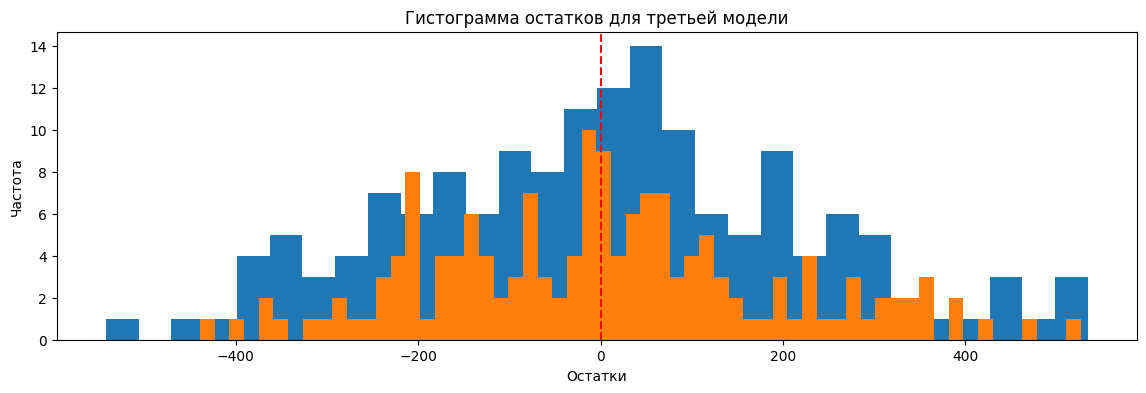

In [72]:
# Построим гистограмму остатков второй модели
plt.figure(figsize=(16, 4))
plt.hist(residuals1, bins=30, alpha = 1)
plt.hist(residuals2, bins=60, alpha = 1)
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.title('Гистограмма остатков для третьей модели')
plt.show()

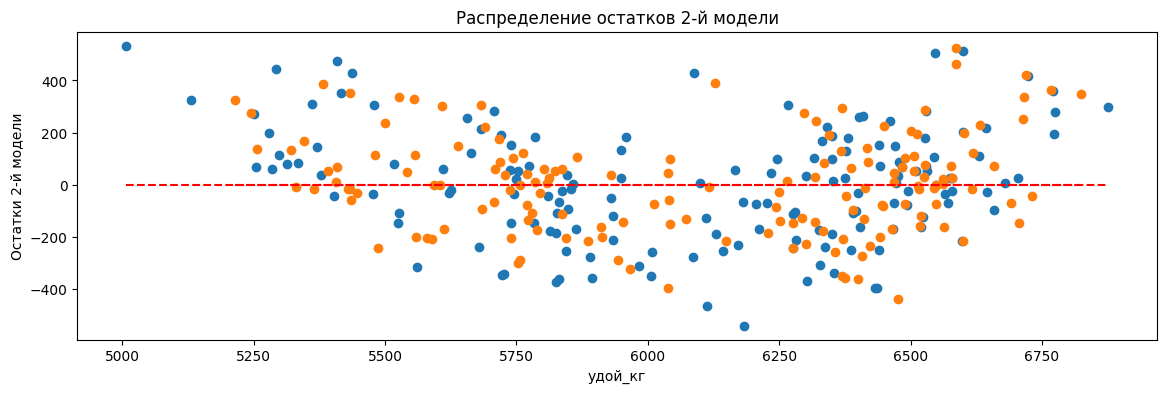

In [73]:
plt.figure(figsize=(16, 4))
plt.scatter(predictions1, residuals1)
plt.scatter(predictions2, residuals2)
plt.plot([min(predictions2), max(predictions2)], [0, 0], color='red', linestyle='--')
plt.plot([min(predictions1), max(predictions1)], [0, 0], color='red', linestyle='--')
plt.xlabel('удой_кг')
plt.ylabel("Остатки 2-й модели")
plt.title("Распределение остатков 2-й модели");

Остатки уменьшились

Добавим в данные новый признак и обучим на них третью модель LinearRegression.

<font color='blue'> <h3>5.3.1. Добавим новый признак

In [74]:
# Добавим признак "Имя Папы" из файла ferma_dad.csv, соединив его с остальными данными ferma_main.csv по ключу.
ferma_main3 = ferma_main.merge(ferma_dad, on='id', how='left')
ferma_main3.head(1)

id  удой_кг   эке  протеин_г   спо          порода тип_пастбища  \
0   1     5863  14.2       1743  0.89  Вис Бик Айдиал    равнинное   

  порода_папы_быка  жирность,%  белок,% вкус_молока      возраст имя_папы  
0           Айдиал        3.58    3.076      вкусно  более_2_лет   Буйный

<font color='blue'> <h3>5.3.2. Устраним нелинейность между признаками.

In [75]:
# Устраним нелинейность между признаками.

# Создадим новый признак 'спо_би', который будет равен 1, если значение СПО больше границы, и 0, если меньше
spo_line = 0.92
ferma_main3['спо_би'] = np.where(ferma_main3['спо'] >= spo_line, 1, 0)

# Введём новый признак ЭКЕ в квадрате
ferma_main3['эке_квадр'] = ferma_main3['эке']**2
ferma_main3.head(1)

id  удой_кг   эке  протеин_г   спо          порода тип_пастбища  \
0   1     5863  14.2       1743  0.89  Вис Бик Айдиал    равнинное   

  порода_папы_быка  жирность,%  белок,% вкус_молока      возраст имя_папы  \
0           Айдиал        3.58    3.076      вкусно  более_2_лет   Буйный   

   спо_би  эке_квадр  
0       0     201.64

<font color='blue'> <h3>5.3.3. Создадим третью модель LinearRegression

In [76]:
# Повторим шаги из пункта 5.1 и создадим третью модель: подготовим данные, обучим модель, оценим её качество и напишем выводы.

# Сохраним во входных переменных данные по списку columns_ferma3
columns_ferma3 = ['эке_квадр', 'протеин_г', 'спо_би', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'порода', 'имя_папы']

# Разобъём данные базы с оптимизированными признаками ferma_main2 на тренировочную и тестовую выборки.<br>
X3 = ferma_main3[columns_ferma3]

# В качестве целевой переменной используем параметр "удой_кг".
y3 = ferma_main3['удой_кг']

# создание константы RANDOM_STATE
RANDOM_STATE = 42

# разделение на тренировочную и тестовую выборки
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3,
    y3,
    test_size = 1/4,
    random_state=RANDOM_STATE
)

# Выберем метод кодирования и выполним инициализацию. Кодируем категориальные признаки средствами sklearn
# Сохраним результаты кодирования. Будем удалять первый столбец при кодировании качественного признака
encoder3 = OneHotEncoder(drop='first', sparse=False)

# Разделим тренировочную выбоку на два списка с цифровыми и категориальными значениями.
# После преобразования данных соединим их

cat_col_names3 = ['тип_пастбища', 'порода_папы_быка', 'порода', 'возраст', 'имя_папы']
num_col_names3 = ['эке_квадр', 'протеин_г', 'спо_би']

# обучим кодированию и сразу трансформируем категориальные признаки из тренировочной выборки
# сделаем это одной командой
X3_train_ohe = encoder3.fit_transform(X3_train[cat_col_names3])

# выполним преобразование категориальных признаков в тестовой выборке
X3_test_ohe = encoder3.transform(X3_test[cat_col_names3])

# сохраним в переменной encoder_col_names названия новых столбцов, ранее бывших категориальными
encoder_col_names3 = encoder3.get_feature_names_out()

# создадим переменную с экземпляром класса StandardScaler()
scaler3 = StandardScaler()

# обучим масштабированию и трансформируем количественные признаки из тренировочной выборки
# сделаем это одной командой
X3_train_scaled = scaler3.fit_transform(X3_train[num_col_names3])

# выполним преобразование количественных признаков в тестовой выборке
X3_test_scaled = scaler3.transform(X3_test[num_col_names3])

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажем из переменной encoder_col_names

X3_train_ohe = pd.DataFrame(X3_train_ohe, columns=encoder_col_names3)
X3_test_ohe = pd.DataFrame(X3_test_ohe, columns=encoder_col_names3)

X3_train_scaled = pd.DataFrame(X3_train_scaled, columns=num_col_names3)
X3_test_scaled = pd.DataFrame(X3_test_scaled, columns=num_col_names3)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X3_train = pd.concat([X3_train_ohe, X3_train_scaled], axis=1)
X3_test = pd.concat([X3_test_ohe, X3_test_scaled], axis=1)

# инициализируем модель линейной регрессии
model_lr3 = LinearRegression()

# обучим модель на тренировочных данных
model_lr3.fit(X3_train, y3_train)

# получим предсказания модели на тестовых данных
# сохраним результат в переменную predictions
predictions3 = model_lr3.predict(X3_test)
print(predictions3[0:3])
print(y3_test[0:3])

[5762.95941988 5204.5771953  6788.95265947]
249    5754
558    5542
174    7141
Name: удой_кг, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<font color='blue'> <h3>5.3.4. Оценим качество третьей модели

In [77]:
# Оценим качество модели на тестовой выборке: рассчитаем R².
r2_3 = r2_score(y3_test, predictions3)
f"R2_3 LinearRegression = {r2_3:.3f}"

'R2_3 LinearRegression = 0.841'

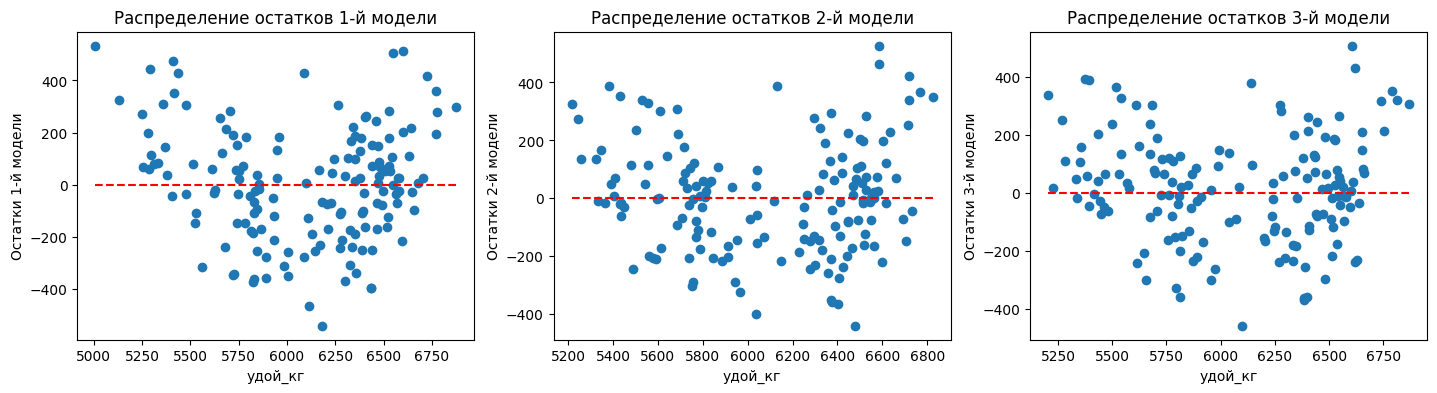

In [78]:
# Проанализируем остатки с помощью графиков.
# Для анализа остатков построим график, отображающий разницу между предсказанными значениями целевой переменной
# и предсказанными значениями модели. Также добавим линию с нулевыми остатками.

fig, axes = plt.subplots(1, 3, figsize=(20, 4))

residuals1 = y1_test - predictions1
axes[0].scatter(predictions1, residuals1)
axes[0].plot([min(predictions1), max(predictions1)], [0, 0], color='red', linestyle='--')
axes[0].set_xlabel('удой_кг')
axes[0].set_ylabel("Остатки 1-й модели")
axes[0].set_title("Распределение остатков 1-й модели");

residuals2 = y2_test - predictions2
axes[1].scatter(predictions2, residuals2)
axes[1].plot([min(predictions2), max(predictions2)], [0, 0], color='red', linestyle='--')
axes[1].set_xlabel('удой_кг')
axes[1].set_ylabel("Остатки 2-й модели")
axes[1].set_title("Распределение остатков 2-й модели");

residuals3 = y3_test - predictions3
axes[2].scatter(predictions3, residuals3)
axes[2].plot([min(predictions3), max(predictions3)], [0, 0], color='red', linestyle='--')
axes[2].set_xlabel('удой_кг')
axes[2].set_ylabel("Остатки 3-й модели")
axes[2].set_title("Распределение остатков 3-й модели");

<font color='blue'> <h2> 5.3. Третья модель LinearRegression

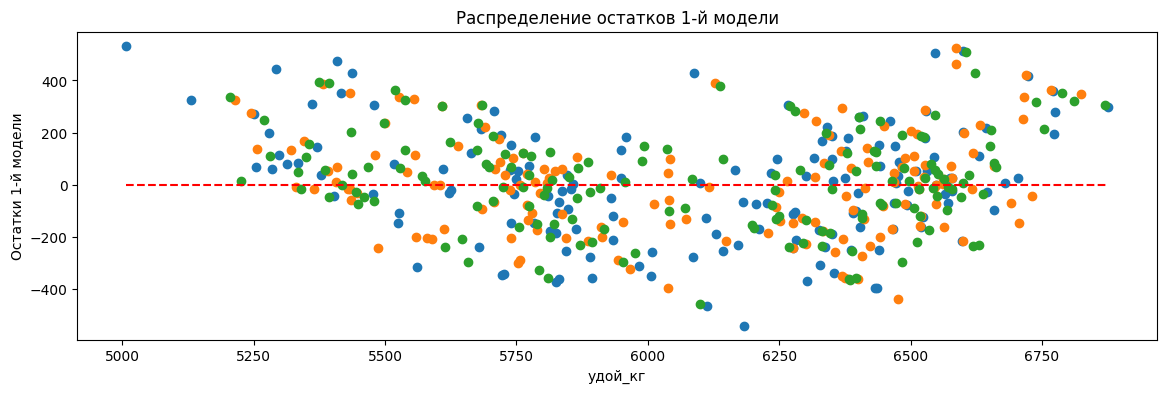

In [79]:
fig, axes = plt.subplots(1,figsize=(16, 4))

plt.scatter(predictions1, residuals1)
plt.scatter(predictions2, residuals2)
plt.scatter(predictions3, residuals3)
plt.plot([min(predictions1), max(predictions1)], [0, 0], color='red', linestyle='--')
plt.xlabel('удой_кг')
plt.ylabel("Остатки 1-й модели")
plt.title("Распределение остатков 1-й модели");

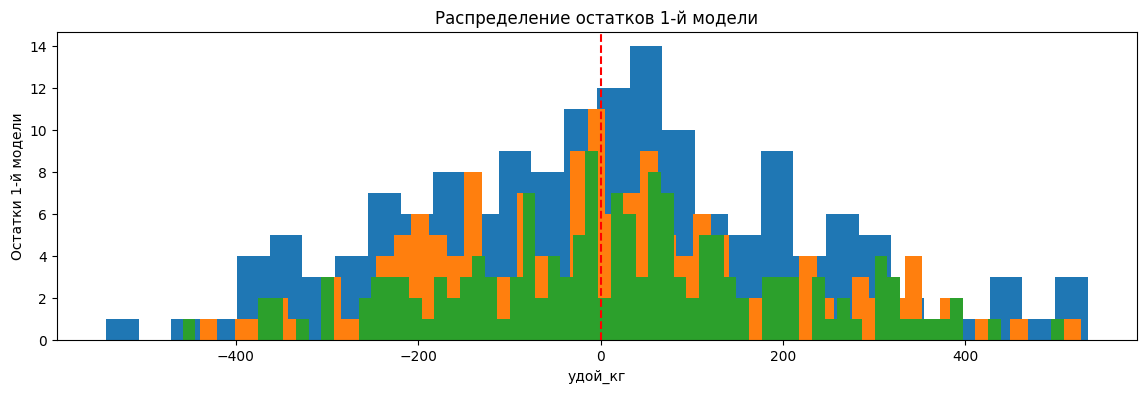

In [80]:
fig, axes = plt.subplots(1, figsize=(16, 4))

plt.hist(residuals1, bins=30, alpha = 1)
plt.hist(residuals2, bins=50, alpha = 1)
plt.hist(residuals3, bins=70, alpha = 1)
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('удой_кг')
plt.ylabel("Остатки 1-й модели")
plt.title("Распределение остатков 1-й модели");

<font color='blue'> <h2>5.4. Сравним качество трёх моделей

<font color='blue'> <h3>5.4.1. R² и остатки.

Сравним качество трёх моделей линейной регрессии, сопоставим их R² и остатки.

In [81]:
# Оценим качество модели на тестовой выборке: рассчитаем R².
f"R2_1 LinearRegression = {r2_1:.3f}", f"R2_2 LinearRegression = {r2_2:.3f}", f"R2_3 LinearRegression = {r2_3:.3f}"

('R2_1 LinearRegression = 0.783',
 'R2_2 LinearRegression = 0.835',
 'R2_3 LinearRegression = 0.841')

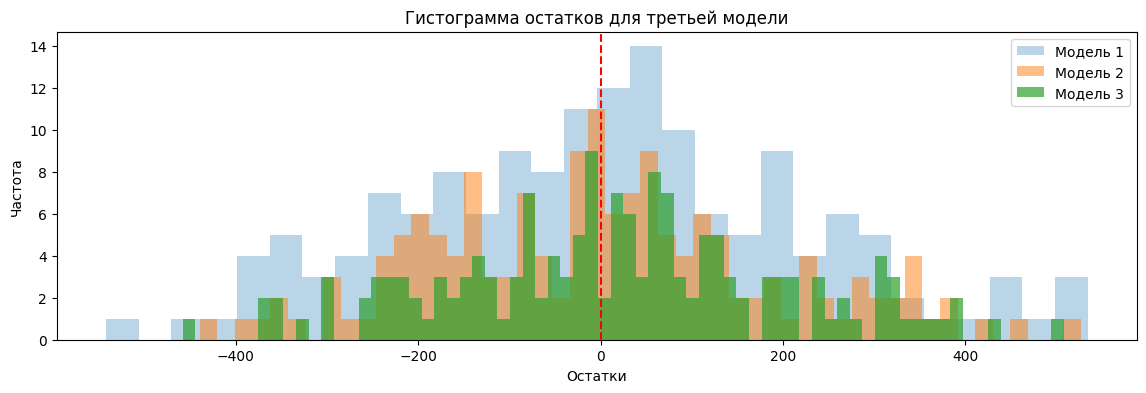

In [82]:
# Сравним гистограммы остатков трёх моделей
plt.figure(figsize=(16, 4))
plt.hist(residuals1, bins=30, alpha = 0.3, label='Модель 1')
plt.hist(residuals2, bins=50, alpha = 0.5, label='Модель 2')
plt.hist(residuals3, bins=70, alpha = 0.7, label='Модель 3')
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.title('Гистограмма остатков для третьей модели')
plt.legend()
plt.show()

<font color='blue'> <h2>5.5 MSE, MAE, RMSE

Оценим качество каждой модели по трём метрикам: MSE, MAE, RMSE. <br>
    Укажем: <br>
·	лучшую модель;<br>
·	доверительный интервал прогноза лучшей модели.<br>

In [83]:
list_predictions = [predictions1, predictions2, predictions3]
list_test = [y1_test, y2_test, y3_test]
index = [1,2,3]
def calculate_mse(y_test, predictions):
    mse = mean_squared_error(y_test, predictions) # Среднеквадратичная ошибка
    return mse
def calculate_rmse(y_test, predictions):
    rmse =  mean_squared_error(y_test, predictions, squared=False) # корень среднеквадратичной ошибки
    return rmse
def calculate_mae(y_test, predictions):
    mae = mean_absolute_error(y_test, predictions) # Средняя абсолютная ошибка
    return mae

for i, y_test, predictions in zip(index, list_test, list_predictions):
    z1 = calculate_mse(y_test, predictions)
    z2 = calculate_rmse(y_test, predictions)
    z3 = calculate_mae(y_test, predictions)
    print(f" Метрики {i} модели: \nMSE_{i} LinearRegression = {z1:.3f}")
    print(f"RMSE_{i} LinearRegression = {z2:.3f}")
    print(f"MAE_{i} LinearRegression = {z3:.3f}\n")

 Метрики 1 модели: 
MSE_1 LinearRegression = 47499.999
RMSE_1 LinearRegression = 217.945
MAE_1 LinearRegression = 173.801

 Метрики 2 модели: 
MSE_2 LinearRegression = 36207.490
RMSE_2 LinearRegression = 190.283
MAE_2 LinearRegression = 149.720

 Метрики 3 модели: 
MSE_3 LinearRegression = 34749.382
RMSE_3 LinearRegression = 186.412
MAE_3 LinearRegression = 146.717



<font color='blue'> <h3>5.5.1 Лучшая модель

По всем показателям метрик ошибок лучшей моделью принимается модель №3

<div class="alert alert-success">
Статья в [.feature_importance](https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html) очень интересная.
feature_importances_ не смог исследовать, потому что метод принадлежит случайному методу RandomForest, но в принципе веса признаков можно посмотреть вот так, согласно статье. Только графики не стал строить.

In [84]:
for feature_number, feature_name in enumerate(X1_train.columns):
    exp_weight = model_lr1.coef_[feature_number]
    print(f"{feature_name:<20}: {exp_weight:+.0f}")

тип_пастбища_холмистое: +50
порода_папы_быка_Соверин: -252
порода_РефлешнСоверинг: +18
возраст_менее_2_лет : -217
эке                 : +159
протеин_г           : +44
спо                 : +169


In [85]:
for feature_number, feature_name in enumerate(X2_train.columns):
    exp_weight = model_lr2.coef_[feature_number]
    print(f"{feature_name:<20}: {exp_weight:+.0f}")

тип_пастбища_холмистое: +38
порода_папы_быка_Соверин: -219
порода_РефлешнСоверинг: +18
возраст_менее_2_лет : -227
эке_квадр           : +154
протеин_г           : +45
спо_би              : +184


In [86]:
for feature_number, feature_name in enumerate(X3_train.columns):
    exp_weight = model_lr3.coef_[feature_number]
    print(f"{feature_name:<20}: {exp_weight:+.0f}")

тип_пастбища_холмистое: +54
порода_папы_быка_Соверин: +49
порода_РефлешнСоверинг: +37
возраст_менее_2_лет : -198
имя_папы_Буйный     : +310
имя_папы_Геркулес   : +357
имя_папы_Соловчик   : +33
эке_квадр           : +157
протеин_г           : +49
спо_би              : +177


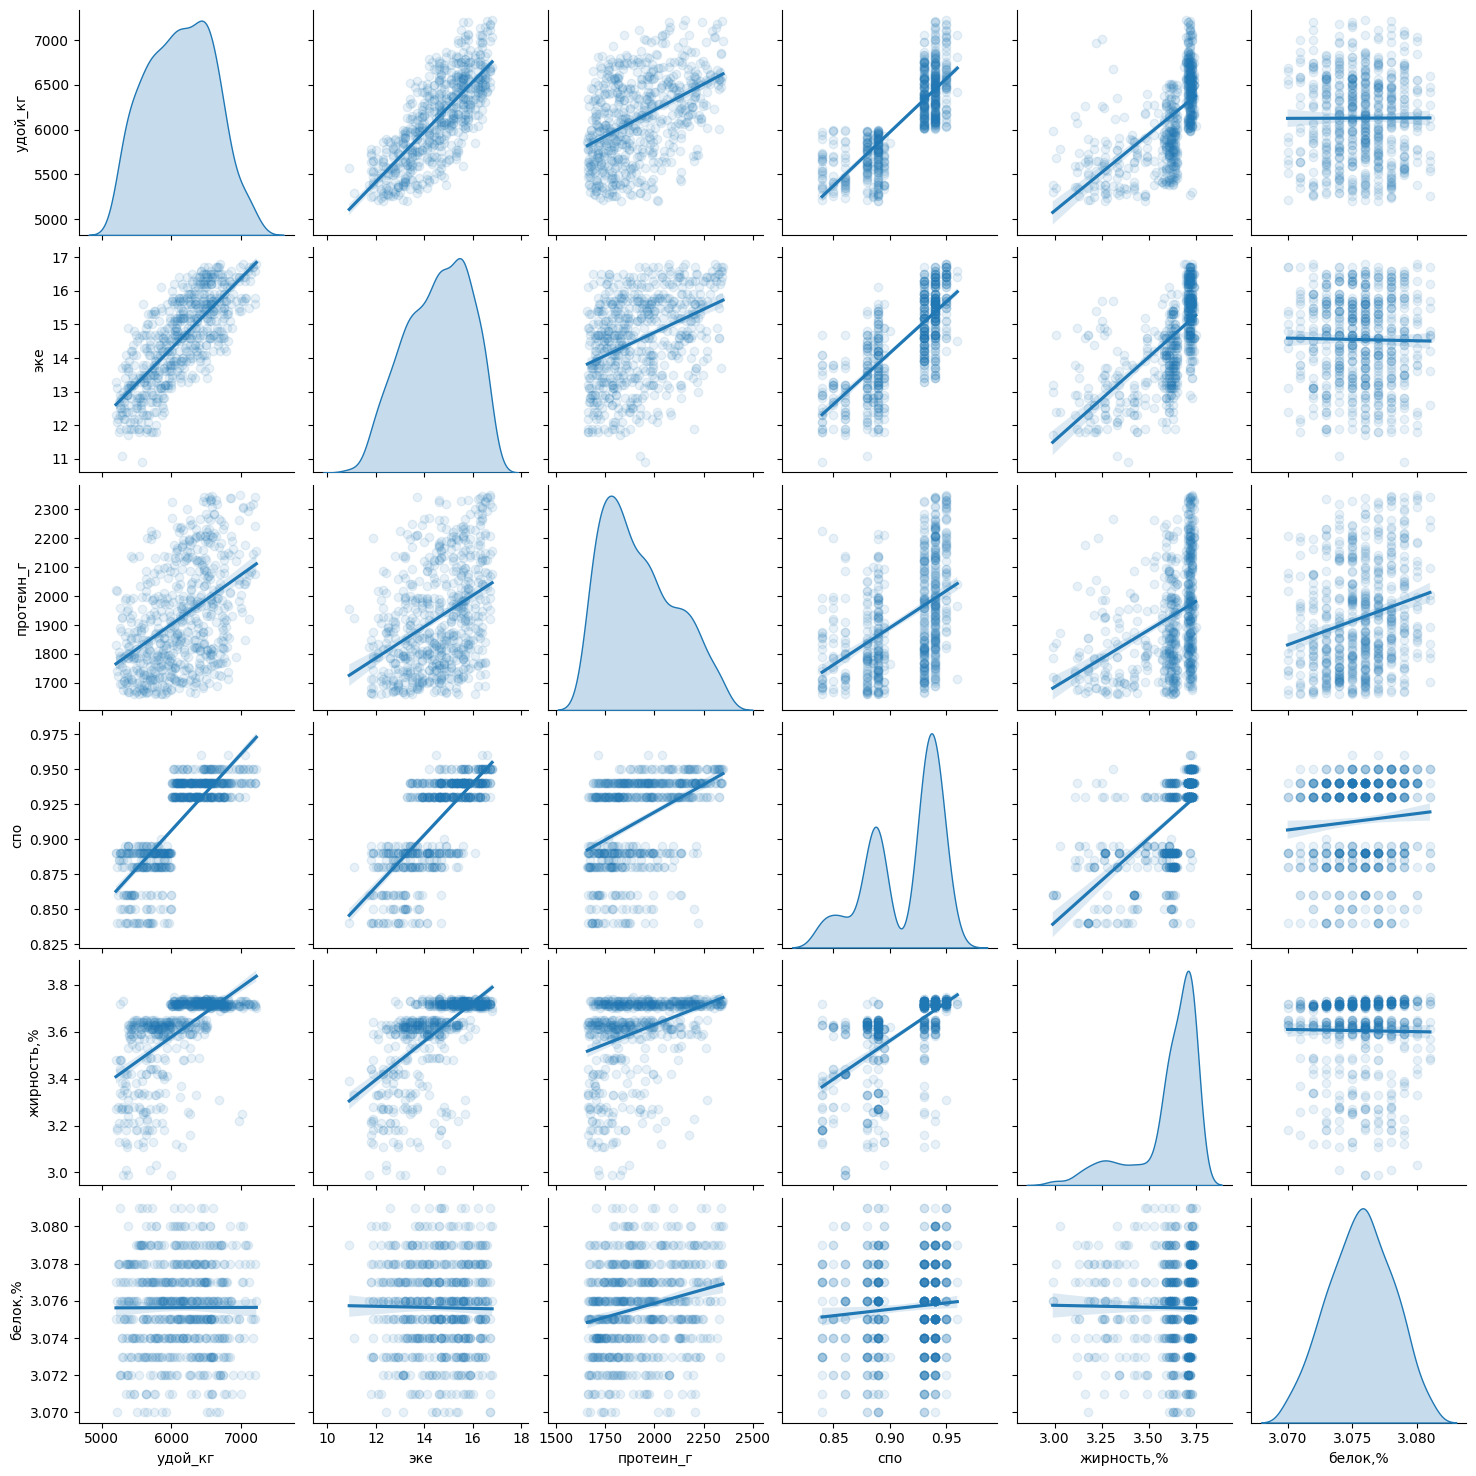

In [87]:
train_dataset = ferma_main.copy()
train_dataset.insert(0, "MedHouseVal", y1_train)
_ = sns.pairplot(
    train_dataset[
        ['удой_кг', 'эке', 'протеин_г', 'спо', 'жирность,%', 'белок,%']
    ],
    kind="reg",
    diag_kind="kde",
    plot_kws={"scatter_kws": {"alpha": 0.1}},
)

<font color='blue'> <h3>5.5.2 Доверительный интервал прогноза лучшей модели

In [88]:
# Доверительный интервал с уровнем доверия alpha вычисляют по распределению Стьюдента:
confidence = 0.95

n = len(predictions3) # длина списка
m = predictions3.mean() # среднее значение
std_err = sem(predictions3) # стандартное отклонение значений
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

start = m - h
end = m + h

start, m, end

(6003.145096387503, 6072.695940290335, 6142.246784193167)

<font color='blue'> <h2>5.6  Cпрогнозируем удой коров

С помощью лучшей модели спрогнозируем удой коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv

<font color='blue'> <h3>5.6.1 Добавим недостающие признаки

In [89]:
# Добавим недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение).
# Для этого возьмём из датасета ferma_main.csv средние значения каждого из признаков и увеличим их на 5%.

cow_buy3 = cow_buy.copy()
cow_buy3['эке'] = ferma_main['эке'].mean()* 1.05
cow_buy3['протеин_г'] = ferma_main['протеин_г'].mean()* 1.05
cow_buy3['спо'] = ferma_main['спо'].mean()* 1.05
cow_buy3.head(3)

порода тип_пастбища порода_папы_быка  имя_папы  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный   
2  РефлешнСоверинг    равнинное          Соверин     Барин   

   текущая_жирность,%  текущий_уровень_белок,%      возраст        эке  \
0                3.58                    3.076  более_2_лет  15.276742   
1                3.54                    3.081  менее_2_лет  15.276742   
2                3.59                    3.074  более_2_лет  15.276742   

    протеин_г       спо  
0  2019.77191  0.958947  
1  2019.77191  0.958947  
2  2019.77191  0.958947

In [90]:
# Переименуем столцы текущая_жирность,% и текущий_уровень_белок,%, на жирность,% и белок,%

cow_buy3 = cow_buy3.rename(columns ={'текущая_жирность,%' : 'жирность,%', 'текущий_уровень_белок,%' : 'белок,%'})
cow_buy3.head(3)

порода тип_пастбища порода_папы_быка  имя_папы  жирность,%  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес        3.58   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный        3.54   
2  РефлешнСоверинг    равнинное          Соверин     Барин        3.59   

   белок,%      возраст        эке   протеин_г       спо  
0    3.076  более_2_лет  15.276742  2019.77191  0.958947  
1    3.081  менее_2_лет  15.276742  2019.77191  0.958947  
2    3.074  более_2_лет  15.276742  2019.77191  0.958947

<font color='blue'> <h3>5.6.2 Подготовка данных

In [91]:
# Выполним подготовку данных, аналогичную той, которую делали для тренировочной выборки.<br>
# В третьей модели у нас были следующие столбцы во входных данных:
X3_train.head(3)

тип_пастбища_холмистое  порода_папы_быка_Соверин  порода_РефлешнСоверинг  \
0                     0.0                       1.0                     0.0   
1                     0.0                       0.0                     0.0   
2                     0.0                       0.0                     0.0   

   возраст_менее_2_лет  имя_папы_Буйный  имя_папы_Геркулес  имя_папы_Соловчик  \
0                  0.0              0.0                0.0                0.0   
1                  0.0              1.0                0.0                0.0   
2                  0.0              1.0                0.0                0.0   

   эке_квадр  протеин_г    спо_би  
0   1.626057   0.206082  0.791946  
1   1.449208  -0.185338  0.791946  
2  -0.430475   0.265882 -1.262713

In [92]:
# Создадим новый признак 'спо_би', который будет равен 1, если значение СПО больше границы, и 0, если меньше
spo_line = 0.92
cow_buy3['спо_би'] = np.where(cow_buy3['спо'] >= spo_line, 1, 0)

# Введём новый признак ЭКЕ в квадрате
cow_buy3['эке_квадр'] = cow_buy3['эке']**2
cow_buy3.head(1)

порода тип_пастбища порода_папы_быка  имя_папы  жирность,%  \
0  Вис Бик Айдиал    холмистое           Айдиал  Геркулес        3.58   

   белок,%      возраст        эке   протеин_г       спо  спо_би   эке_квадр  
0    3.076  более_2_лет  15.276742  2019.77191  0.958947       1  233.378833

In [93]:
# Отфильтруем данные
X3_cb = cow_buy3[columns_ferma3]
X3_cb.head(1)

эке_квадр   протеин_г  спо_би тип_пастбища порода_папы_быка      возраст  \
0  233.378833  2019.77191       1    холмистое           Айдиал  более_2_лет   

           порода  имя_папы  
0  Вис Бик Айдиал  Геркулес

In [94]:
# Выберем метод кодирования и выполним инициализацию. Кодируем категориальные признаки средствами sklearn
# Сохраним результаты кодирования. Будем удалять первый столбец при кодировании качественного признака


# Разделим тренировочную выбоку на два списка с цифровыми и категориальными значениями.
# После преобразования данных соединим их

cat_cb = ['тип_пастбища', 'порода_папы_быка', 'порода', 'возраст', 'имя_папы']
num_cb = ['эке_квадр', 'протеин_г', 'спо_би']

# обучим кодированию и сразу трансформируем категориальные признаки, сделаем это одной командой
X3_ohe_cb = encoder3.transform(X3_cb[cat_cb])

# сохраним в переменной encoder_col_names названия новых столбцов, ранее бывших категориальными
encoder_col_names_cb = encoder3.get_feature_names_out()

# создадим переменную с экземпляром класса StandardScaler()


# обучим масштабированию и трансформируем количественные признаки сделаем это одной командой
X3_scaled_cb = scaler3.transform(X3_cb[num_cb])

# создаём датафрейм из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажем из переменной encoder_col_names

X3_ohe_cb = pd.DataFrame(X3_ohe_cb, columns=encoder_col_names_cb)

X3_scaled_cb = pd.DataFrame(X3_scaled_cb, columns=num_cb)

# объединяем все преобразованные данные в датафрейм
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X3_cb = pd.concat([X3_ohe_cb, X3_scaled_cb], axis=1)
X3_cb.head()

тип_пастбища_холмистое  порода_папы_быка_Соверин  порода_РефлешнСоверинг  \
0                     1.0                       0.0                     0.0   
1                     0.0                       1.0                     0.0   
2                     0.0                       1.0                     1.0   
3                     1.0                       0.0                     1.0   
4                     0.0                       0.0                     1.0   

   возраст_менее_2_лет  имя_папы_Буйный  имя_папы_Геркулес  имя_папы_Соловчик  \
0                  0.0              0.0                1.0                0.0   
1                  1.0              1.0                0.0                0.0   
2                  0.0              0.0                0.0                0.0   
3                  0.0              1.0                0.0                0.0   
4                  0.0              1.0                0.0                0.0   

   эке_квадр  протеин_г    спо_би  
0   0.495804   0.498407  0.791946  
1   0.495804   0.498407  0.791946  
2   0.495804   0.498407  0.791946  
3   0.495804   0.498407  0.791946  
4   0.495804   0.498407  0.791946

In [95]:
# получим предсказания модели на данных X3_cb
# сохраним результат в переменную predictions
predictions_cb = model_lr3.predict(X3_cb)
print(predictions_cb)

[6609.25367288 6358.10267231 6283.59321351 6599.11444126 6544.61992539
 6442.50025097 6609.25367288 6556.59715012 6283.59321351 6400.61996346
 6334.07609338 6640.99472878 6609.25367288 6102.46407806 6283.59321351
 6599.11444126 6334.07609338 6442.50025097 6556.59715012 6544.61992539]


<font color='blue'> <h3>5.6.4 Выводы

Были подготовлены данные и обучены 3-и модели линейной регресии:<br>
- В первой были использованы все признаки, кроме производных признаков от целевого "удой_кг": "жирность,%", "белок,%", "вкус_молока";<br>
- Во второй модели удаляли нелинейность между признаками: спо - преобразованием в бинарный признак, эке - через преобразование в квадрат;<br>
- В третьей вводили дополнительные признаки - "имя отца коровы" <br>

Найдены значения ошибок их предсказаний:<br>
- сопоставили их R² и остатки;<br>
- сопоставлены их качество в метриках MSE, MAE, RMSE;<br>

Выяснили, что третья модель имеет минимальную ошибку предсказания. Вычислили диапозон доверия для неё - (6003, среднее 6073, 6142) <br>
Спрогнозировали удой для датасета от ЭкоФермы на основании третьей модели<br>

<font color='blue'> <h1>6. Задача классификации

<font color='blue'> <h2>6.1 Модель LogisticRegression №1

Подготовим данные датасета ferma_main.csv и обучите на них модель LogisticRegression

<font color='blue'> <h3>6.1.1. Разбивка подготовленных данных на тренировочную и тестовую выборки

При необходимости преобразуем имеющиеся или добавим новые признаки

In [96]:
# Добавим признак "Имя Папы" из файла ferma_dad.csv, соединив его с остальными данными ferma_main.csv по ключу.

ferma_main4 = ferma_main.merge(ferma_dad, on='id', how='left')
ferma_main4.head(1)

id  удой_кг   эке  протеин_г   спо          порода тип_пастбища  \
0   1     5863  14.2       1743  0.89  Вис Бик Айдиал    равнинное   

  порода_папы_быка  жирность,%  белок,% вкус_молока      возраст имя_папы  
0           Айдиал        3.58    3.076      вкусно  более_2_лет   Буйный

In [97]:
# Используем в качестве целевого признак "Вкус молока"

X4 = ferma_main4.drop({'id','вкус_молока'} , axis=1)
y4 = ferma_main4['вкус_молока']

In [98]:
# Разбьём данные на тренировочную и тестовую выборки
# stratify=y - cтратификация (равномерное распределение) классов в выборках

RANDOM_STATE = 42
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4,  random_state=RANDOM_STATE, stratify=y4)

X4_train.shape, X4_test.shape, y4_train.shape, y4_test.shape

((467, 11), (156, 11), (467,), (156,))

<font color='blue'> <h3>6.1.2. Кодирование и масштабирование

In [99]:
# Кодируем категориальные признаки с помощью OneHotEncoder.
# Масштабируем количественные признаки с помощью StandardScaler.

# Выберем метод кодирования и выполним инициализацию. Кодируем категориальные признаки средствами sklearn
# Сохраним результаты кодирования. Будем удалять первый столбец при кодировании качественного признака
encoder4 = OneHotEncoder(drop='first', sparse=False)

# Разделим тренировочную выбоку на два списка с цифровыми и категориальными значениями.
# После преобразования данных соединим их

cat_col_names4 = ['порода','тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы']
num_col_names4 = ['удой_кг', 'эке', 'протеин_г', 'спо', 'жирность,%', 'белок,%']

# обучим кодированию и сразу трансформируем категориальные признаки из тренировочной выборки
# сделаем это одной командой
X4_train_ohe = encoder4.fit_transform(X4_train[cat_col_names4])

# выполним преобразование категориальных признаков в тестовой выборке
X4_test_ohe = encoder4.transform(X4_test[cat_col_names4])

# сохраним в переменной encoder_col_names названия новых столбцов, ранее бывших категориальными
encoder_col_names4 = encoder4.get_feature_names_out()

# создадим переменную с экземпляром класса StandardScaler()
scaler4 = StandardScaler()

# обучим масштабированию и трансформируем количественные признаки из тренировочной выборки
# сделаем это одной командой
X4_train_scaled = scaler4.fit_transform(X4_train[num_col_names4])

# выполним преобразование количественных признаков в тестовой выборке
X4_test_scaled = scaler4.transform(X4_test[num_col_names4])

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажем из переменной encoder_col_names

X4_train_ohe = pd.DataFrame(X4_train_ohe, columns=encoder_col_names4)
X4_test_ohe = pd.DataFrame(X4_test_ohe, columns=encoder_col_names4)

X4_train_scaled = pd.DataFrame(X4_train_scaled, columns=num_col_names4)
X4_test_scaled = pd.DataFrame(X4_test_scaled, columns=num_col_names4)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X4_train = pd.concat([X4_train_ohe, X4_train_scaled], axis=1)
X4_test = pd.concat([X4_test_ohe, X4_test_scaled], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<font color='blue'> <h3>5.6.3 Получим прогноз удоя коров

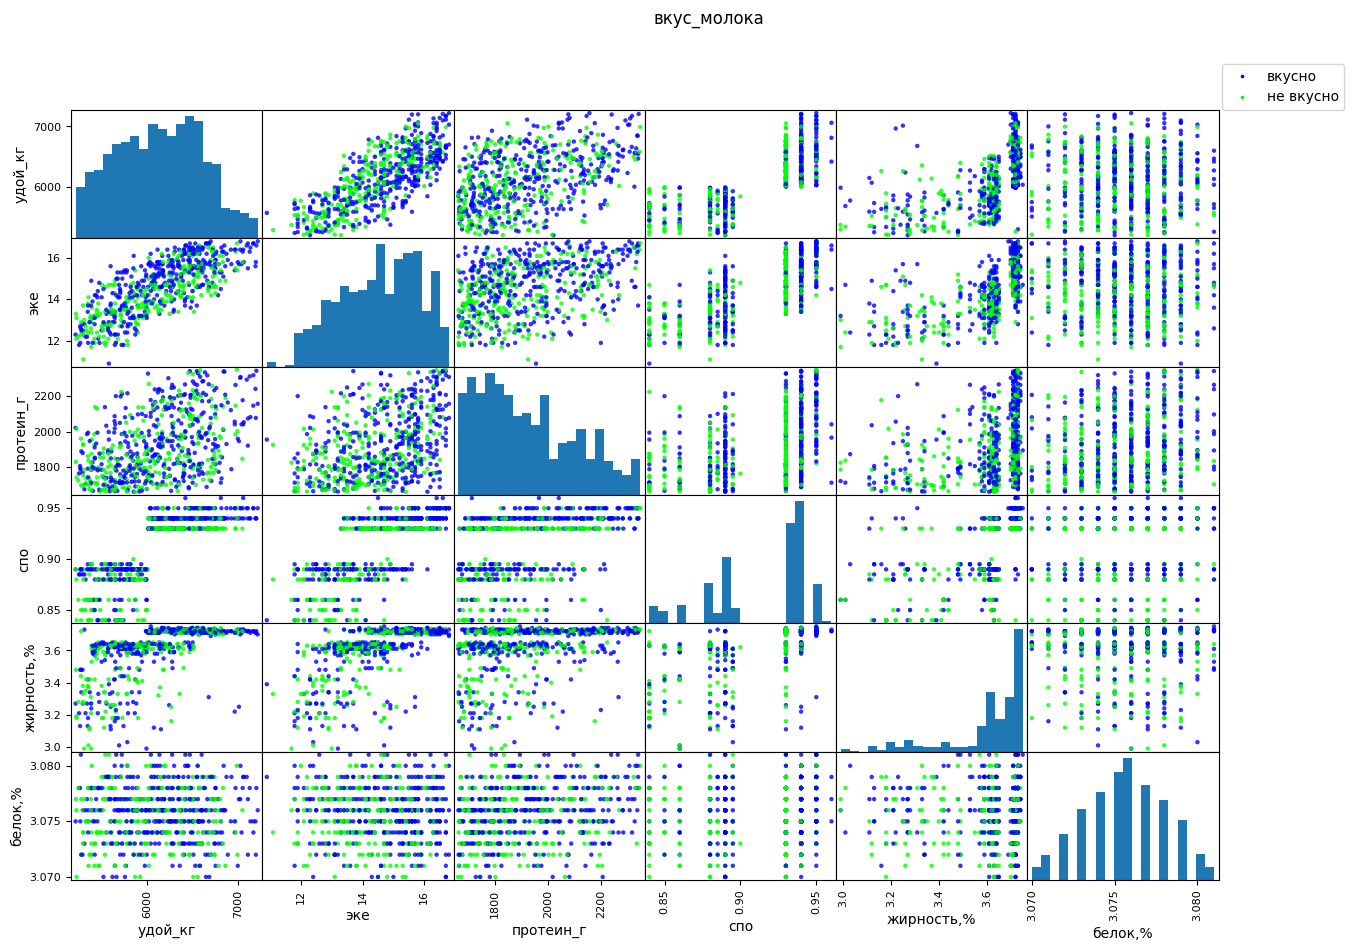

In [100]:
def other_figure(categories):

# Список уникальных териминов в категорильном значении, относительно которых будут сравниваться дисперсии
    list_term2 = ferma_main[categories].unique()

    ferma_main_categories = ferma_main.iloc[:,1:13]
    ferma_main_categories.loc[ferma_main[categories] == list_term2[0], categories] = 0
    ferma_main_categories.loc[ferma_main[categories] == list_term2[1], categories] = 1


    plt.rcParams["figure.subplot.right"] = 0.8
    grr = scatter_matrix(
    ferma_main_categories, c=ferma_main_categories[categories], figsize=(17,10), marker='.2', hist_kwds={'bins':20}, s=10, alpha=.8, cmap='brg')

    handles = [plt.plot([],[],color=plt.cm.brg(i/1.), ls="", marker=".", markersize=np.sqrt(10))[0] for i in range(2)]
    labels=[list_term2[0], list_term2[1]]
    plt.legend(handles, labels, loc=(1.02,6))
    plt.suptitle(categories)
    plt.show()

# Список названий столбцов имеющих категориальные признаки
list_categories = ['вкус_молока']

# С помощью цикла выведем все графики
for categories in list_categories:
    other_figure(categories)

<font color='blue'> <h3>6.1.3. Обучим модель логистической регрессии на подготовленных данных.

In [101]:
# Обучим модель логистической регрессии на подготовленных данных.
clf4 = LogisticRegression()
clf4 = clf4.fit(X4_train, y4_train)

# Выполним вычисление признака
y4_pred = clf4.predict(X4_test)
y4_pred

array(['вкусно', 'вкусно', 'вкусно', 'вкусно', 'вкусно', 'вкусно',
       'вкусно', 'вкусно', 'вкусно', 'вкусно', 'не вкусно', 'вкусно',
       'вкусно', 'вкусно', 'не вкусно', 'вкусно', 'не вкусно', 'вкусно',
       'вкусно', 'вкусно', 'вкусно', 'не вкусно', 'вкусно', 'вкусно',
       'не вкусно', 'вкусно', 'вкусно', 'не вкусно', 'вкусно', 'вкусно',
       'вкусно', 'вкусно', 'не вкусно', 'не вкусно', 'вкусно', 'вкусно',
       'не вкусно', 'не вкусно', 'вкусно', 'вкусно', 'вкусно', 'вкусно',
       'вкусно', 'не вкусно', 'вкусно', 'вкусно', 'вкусно', 'вкусно',
       'вкусно', 'вкусно', 'вкусно', 'не вкусно', 'вкусно', 'вкусно',
       'вкусно', 'не вкусно', 'вкусно', 'вкусно', 'вкусно', 'вкусно',
       'вкусно', 'вкусно', 'вкусно', 'не вкусно', 'не вкусно', 'вкусно',
       'не вкусно', 'вкусно', 'вкусно', 'вкусно', 'не вкусно', 'вкусно',
       'не вкусно', 'вкусно', 'не вкусно', 'вкусно', 'вкусно', 'вкусно',
       'вкусно', 'вкусно', 'вкусно', 'вкусно', 'вкусно', 'вкусно',
     

In [102]:
y4_test

135    не вкусно
322    не вкусно
79        вкусно
399    не вкусно
615    не вкусно
         ...    
165    не вкусно
129       вкусно
139    не вкусно
586       вкусно
19        вкусно
Name: вкус_молока, Length: 156, dtype: object

<font color='blue'> <h3> 6.1.4 Метрики accuracy, recall, precision.

<font color='blue'> <h4> Accuracy

In [103]:
X4_train.head(1)

порода_РефлешнСоверинг  тип_пастбища_холмистое  порода_папы_быка_Соверин  \
0                     0.0                     1.0                       0.0   

   возраст_менее_2_лет  имя_папы_Буйный  имя_папы_Геркулес  имя_папы_Соловчик  \
0                  0.0              1.0                0.0                0.0   

    удой_кг       эке  протеин_г       спо  жирность,%   белок,%  
0  0.359342 -0.414939   1.492821  0.833851   -0.059711  1.803297

In [104]:
# Оценим качество модели на тестовой выборке: рассчитаем метрики accuracy, recall, precision.

acc = accuracy_score(y4_test, y4_pred)
f"Точность предсказания = {acc:.3f}"

'Точность предсказания = 0.635'

In [105]:
# веса признаков логистической регрессии
clf4.coef_

array([[ 0.18243801, -0.63066828, -0.02430392,  0.20272306, -0.16782673,
        -0.4289284 ,  0.40713526,  0.79038005, -0.52033363, -0.16770333,
        -0.6011542 ,  0.11327707, -0.20207452]])

In [106]:
X4_train.columns

Index(['порода_РефлешнСоверинг', 'тип_пастбища_холмистое',
       'порода_папы_быка_Соверин', 'возраст_менее_2_лет', 'имя_папы_Буйный',
       'имя_папы_Геркулес', 'имя_папы_Соловчик', 'удой_кг', 'эке', 'протеин_г',
       'спо', 'жирность,%', 'белок,%'],
      dtype='object')

In [107]:
# Значения коэффициентов
import math

for feature_number, feature_name in enumerate(X4_train.columns):
    exp_weight = math.exp(clf4.coef_[0, feature_number])
    print(f"{feature_name:<20}: {exp_weight:+.6f}")

порода_РефлешнСоверинг: +1.200140
тип_пастбища_холмистое: +0.532236
порода_папы_быка_Соверин: +0.975989
возраст_менее_2_лет : +1.224733
имя_папы_Буйный     : +0.845500
имя_папы_Геркулес   : +0.651207
имя_папы_Соловчик   : +1.502507
удой_кг             : +2.204234
эке                 : +0.594322
протеин_г           : +0.845605
спо                 : +0.548179
жирность,%          : +1.119942
белок,%             : +0.817034


In [108]:
# Посмотрим на результат оценки категориальных значений в методе confusion_matrix
test = ['вкусно', 'вкусно', 'вкусно', 'вкусно']
pred = ['вкусно', 'не вкусно', 'вкусно', 'вкусно']

confusion_t = confusion_matrix(test, pred)
confusion_t

array([[3, 1],
       [0, 0]])

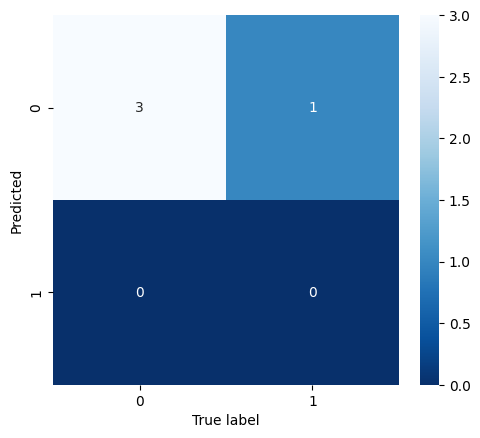

In [109]:
sns.heatmap(confusion_t, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('Predicted')
plt.xlabel('True label');

Вместо необходимых нам TP на совпадение значений "вкусно" - "вкусно", алгоритм назначил TN.

In [110]:
# Исправим значения
test2 = ['вкусно', 'вкусно', 'вкусно', 'вкусно']
pred2 = ['вкусно', 'не вкусно', 'вкусно', 'вкусно']

confusion_t2 = confusion_matrix(test2, pred2, labels=['не вкусно','вкусно'])
confusion_t2

array([[0, 0],
       [1, 3]])

<font color='blue'> <h4> Confusion - матрица ошибок

In [111]:
confusion4 = confusion_matrix(y4_test, y4_pred, labels=['не вкусно','вкусно'])
confusion4

array([[22, 42],
       [15, 77]])

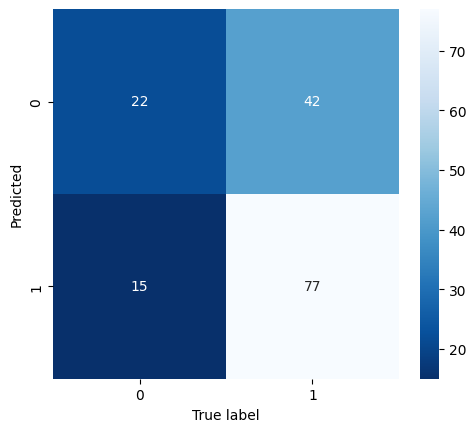

In [112]:
sns.heatmap(confusion4, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('Predicted')
plt.xlabel('True label');

<font color='blue'> <h4> Recall, Precision

In [113]:
recall4 = recall_score(y4_test, y4_pred, pos_label='вкусно') # TP/(TP + FN) = 77/(77 + 15) = 83,3%
precision4 = precision_score(y4_test, y4_pred, pos_label='вкусно') # TP/(TP + FP) = 77/(77 + 42) = 64,7%

f"Значения показателя {recall4 = :.3f} - полнота предсказаний", \
f"Значения показателя {precision4 = :.3f} - точность предскзаний"

# значения совпали с вычисленными вручную по формулам

('Значения показателя recall4 = 0.837 - полнота предсказаний',
 'Значения показателя precision4 = 0.647 - точность предскзаний')

<font color='blue'> <h2>6.2. Анализ модели логистической регрессии

<font color='blue'> <h3>6.2.1 Анализ ошибок

<b>Объясним, какая ошибка критичнее всего при покупке коров: первого или второго рода. С учетом того, что главное для заказчика — вкусное молоко. Сформулируем ответ с учётом метрик recall и precision, выберем более важную из них.<br></b>

Задача — выбрать коров, которые дают вкусное молоко, и передать их фермеру. Модель уже даёт 69 ответов True Positive. Максимально уменьшим ошибки False Positive на валидации, тем самым увеличим показатель Precision выборки. В этом поможет регулирование порога.

Для уменьшения количества ложноположительных заключений нужно увеличить порог принадлежности к классу "вкусно" - 1. Это означает, что модель будет более консервативной в определении молока как вкусного и будет классифицировать его только в случаях, когда уверена в своем решении.

Для изменения порога принадлежности к классам можно использовать метод predict_proba(), который возвращает вероятности принадлежности к классам. Затем можно выбрать новый порог

In [114]:
y4_proba = clf4.predict_proba(X4_test)
y4_proba[0:2]

array([[0.67680051, 0.32319949],
       [0.59861807, 0.40138193]])

In [115]:
# создадим таблицу с отсортированными предсказаниями. В левой колонке указана вероятность принадлежности объекта к классу 1,
# а справа — к классу 0. Выберем класс 1 - первый столбец (индекс 0) ("Вкусно"), [:,0]

y4_proba = clf4.predict_proba(X4_test)[:,0]

data = pd.DataFrame(zip(y4_test, y4_proba), columns = ['реальный вкус', 'y4_proba'])
data_sort = data.sort_values(by='y4_proba', ascending=False)
print(data_sort.head())

# нет значений верояности "вкусности" близких к единице. Надо заниматься улучшением качества модели.?????

    реальный вкус  y4_proba
22         вкусно  0.866211
151     не вкусно  0.842904
130        вкусно  0.836919
68         вкусно  0.824358
126        вкусно  0.823370


Проверим, можно ли исключить FP предсказания в такой модели.<br>
Сгенерируем пороги с помощью функция linspace. Сейчас уровень вероятности принадлежности отсекается на 0,5

In [116]:
# Посчитаем значение precision при разных порогах, для этого создадим функцию:

thresholds = [round(i,2) for i in np.linspace(0.1,1, num = 40, endpoint=False)]

# добавим столбцы
values = []
columns = []
for i in thresholds:
    columns.append('y4_pred_'+str(i))
    data['y4_pred_'+ str(i)] = data['y4_proba'].apply(lambda x: 'вкусно' if x >= i else 'не вкусно')
    precision2 = precision_score(y4_test, data['y4_pred_'+str(i)], pos_label = 'вкусно')
    values.append(precision2)

costs = pd.DataFrame(zip(columns, values),columns = ['Порог', 'Precision'])
costs

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

Порог  Precision
0    y4_pred_0.1   0.589744
1   y4_pred_0.12   0.589744
2   y4_pred_0.15   0.589744
3   y4_pred_0.17   0.593548
4   y4_pred_0.19   0.593548
5   y4_pred_0.21   0.593548
6   y4_pred_0.24   0.593548
7   y4_pred_0.26   0.605263
8   y4_pred_0.28   0.606667
9    y4_pred_0.3   0.605442
10  y4_pred_0.32   0.608392
11  y4_pred_0.35   0.607143
12  y4_pred_0.37   0.611511
13  y4_pred_0.39   0.605839
14  y4_pred_0.42   0.616541
15  y4_pred_0.44   0.618321
16  y4_pred_0.46   0.609375
17  y4_pred_0.48   0.619048
18   y4_pred_0.5   0.647059
19  y4_pred_0.53   0.675676
20  y4_pred_0.55   0.679245
21  y4_pred_0.57   0.676768
22   y4_pred_0.6   0.707865
23  y4_pred_0.62   0.691358
24  y4_pred_0.64   0.700000
25  y4_pred_0.66   0.682540
26  y4_pred_0.68   0.696429
27  y4_pred_0.71   0.785714
28  y4_pred_0.73   0.757576
29  y4_pred_0.75   0.777778
30  y4_pred_0.77   0.750000
31   y4_pred_0.8   0.875000
32  y4_pred_0.82   0.800000
33  y4_pred_0.84   0.500000
34  y4_pred_0.86   1.000000
35  y4_pred_0.89   0.000000
36  y4_pred_0.91   0.000000
37  y4_pred_0.93   0.000000
38  y4_pred_0.96   0.000000
39  y4_pred_0.98   0.000000

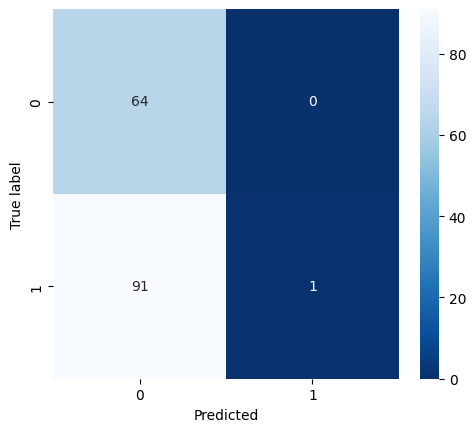

In [117]:
# Посчитаем confusion_matrix для порога threshold при котором FP = 0
new_threshold = 0.86
preds4 = np.where(y4_proba > new_threshold, "вкусно", "не вкусно")

confusion_min_FP4 = confusion_matrix(y4_test, preds4, labels=['не вкусно','вкусно'])
sns.heatmap(confusion_min_FP4, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

<font color='blue'> <h3>6.2.2 Вывод

1. Исходя из анализа данных работы данной модели по предсказанию вкуса молока LogisticRegression №1, невозможно предсказать вкус со 100% вероятностью (с нулевым значением FP), так как максимальный precision = 1, при практически нулевом предсказании TP, что делает данную модель не работоспособной.<br>
Точность предсказания по методу accuracy = 0.635<br>
<b>Модель строилась по спискам колонок:<br>
cat_col_names4 = ['порода','тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы']<br>
num_col_names4 = ['удой_кг', 'эке', 'протеин_г', 'спо', 'жирность,%', 'белок,%']<br></b>
<br>
Изучим корреляцию данных и диаграммы рассеяния признаков. Преобразуем данные согласно этому анализу, чтобы улучшить показатель accuracy.

In [118]:
ferma_main5 = ferma_main4.copy()
ferma_main5.phik_matrix()

interval columns not set, guessing: ['id', 'удой_кг', 'эке', 'протеин_г', 'спо', 'жирность,%', 'белок,%']


id   удой_кг       эке  протеин_г       спо    порода  \
id                1.000000  0.000000  0.000000   0.113668  0.382619  0.613572   
удой_кг           0.000000  1.000000  0.720303   0.466145  0.661352  0.162958   
эке               0.000000  0.720303  1.000000   0.451619  0.591611  0.115077   
протеин_г         0.113668  0.466145  0.451619   1.000000  0.387949  0.085472   
спо               0.382619  0.661352  0.591611   0.387949  1.000000  0.052108   
порода            0.613572  0.162958  0.115077   0.085472  0.052108  1.000000   
тип_пастбища      0.000000  0.274778  0.103464   0.084767  0.145166  0.206840   
порода_папы_быка  0.319636  0.518814  0.173375   0.000000  0.427383  0.093854   
жирность,%        0.524392  0.707631  0.717536   0.403626  0.643040  0.222665   
белок,%           0.000000  0.233484  0.000000   0.225745  0.000000  0.375280   
вкус_молока       0.061064  0.173285  0.273181   0.173276  0.572829  0.000000   
возраст           0.000000  0.998067  0.772487   0.348442  0.748693  0.053406   
имя_папы          0.000000  0.433260  0.081018   0.099075  0.407679  0.378483   

                  тип_пастбища  порода_папы_быка  жирность,%   белок,%  \
id                    0.000000          0.319636    0.524392  0.000000   
удой_кг               0.274778          0.518814    0.707631  0.233484   
эке                   0.103464          0.173375    0.717536  0.000000   
протеин_г             0.084767          0.000000    0.403626  0.225745   
спо                   0.145166          0.427383    0.643040  0.000000   
порода                0.206840          0.093854    0.222665  0.375280   
тип_пастбища          1.000000          0.000000    0.000000  0.149085   
порода_папы_быка      0.000000          1.000000    0.000000  0.078668   
жирность,%            0.000000          0.000000    1.000000  0.000000   
белок,%               0.149085          0.078668    0.000000  1.000000   
вкус_молока           0.268762          0.000000    0.201406  0.107450   
возраст               0.123505          0.351328    0.682940  0.000000   
имя_папы              0.226376          0.983494    0.097142  0.087294   

                  вкус_молока   возраст  имя_папы  
id                   0.061064  0.000000  0.000000  
удой_кг              0.173285  0.998067  0.433260  
эке                  0.273181  0.772487  0.081018  
протеин_г            0.173276  0.348442  0.099075  
спо                  0.572829  0.748693  0.407679  
порода               0.000000  0.053406  0.378483  
тип_пастбища         0.268762  0.123505  0.226376  
порода_папы_быка     0.000000  0.351328  0.983494  
жирность,%           0.201406  0.682940  0.097142  
белок,%              0.107450  0.000000  0.087294  
вкус_молока          1.000000  0.156310  0.000000  
возраст              0.156310  1.000000  0.389225  
имя_папы             0.000000  0.389225  1.000000

<font color='blue'> <h2>6.3 Модель LogisticRegression №2

Исправим список категорий участвующих в анализе. Оставим только те, у которых не нулевая корреляция со вкусом: <br>
<br>
удои - 0,17<br>
эке - 0,27<br>
протеин - 0,17<br>
спо - 0,57<br>
тип пастбища - 0,27<br>
жирность 0,2<br>
белок - 0,1<br>
возраст - 0,16<br>
<br>
Максимальная корреляция у показателя СПО, которого в базе данных cow_buy нет, но так как это качество корма, то данный показатель можно выбрать из тех значений, которые дают максимальное количество вкусного молока. И рекомендовать это фермеру.<br>
<b>Новую модель будем строить по спискам колонок:<br>
cat_col_names4 = ['тип_пастбища', 'возраст']<br>
num_col_names4 = ['жирность,%', 'белок,%', 'спо']<br></b>


In [119]:
ferma_main5.head(1)

id  удой_кг   эке  протеин_г   спо          порода тип_пастбища  \
0   1     5863  14.2       1743  0.89  Вис Бик Айдиал    равнинное   

  порода_папы_быка  жирность,%  белок,% вкус_молока      возраст имя_папы  
0           Айдиал        3.58    3.076      вкусно  более_2_лет   Буйный

In [120]:
cow_buy.head(1)

порода тип_пастбища порода_папы_быка  имя_папы  текущая_жирность,%  \
0  Вис Бик Айдиал    холмистое           Айдиал  Геркулес                3.58   

   текущий_уровень_белок,%      возраст  
0                    3.076  более_2_лет

In [121]:
X5 = ferma_main5.drop({'id','вкус_молока','удой_кг', 'протеин_г', 'порода','порода_папы_быка', 'эке', 'имя_папы'} , axis=1)
X5.head(1)

спо тип_пастбища  жирность,%  белок,%      возраст
0  0.89    равнинное        3.58    3.076  более_2_лет

In [122]:
# Целевой признак "Вкус молока"
X5 = ferma_main5.drop({'id','вкус_молока','удой_кг', 'протеин_г', 'порода','порода_папы_быка', 'эке', 'имя_папы'} , axis=1)
y5 = ferma_main5['вкус_молока']

# Разбьём данные на тренировочную и тестовую выборки
RANDOM_STATE = 42
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5,  random_state=RANDOM_STATE, stratify=y4)

# Кодируем категориальные признаки с помощью OneHotEncoder.
encoder5 = OneHotEncoder(drop='first', sparse=False)

# Разделим тренировочную выбоку на два списка с цифровыми и категориальными значениями.
# После преобразования данных соединим их

cat_col_names5 = ['тип_пастбища', 'возраст']
num_col_names5 = ['жирность,%', 'белок,%', 'спо']

# трансформируем категориальные признаки
X5_train_ohe = encoder5.fit_transform(X5_train[cat_col_names5])

# преобразуем категориальные признаки
X5_test_ohe = encoder5.transform(X5_test[cat_col_names5])

# сохраним в переменной encoder_col_names названия новых столбцов, ранее бывших категориальными
encoder_col_names5 = encoder5.get_feature_names_out()

# Масштабируем количественные признаки с помощью StandardScaler.
# создадим переменную с экземпляром класса StandardScaler()
scaler5 = StandardScaler()

# трансформируем количественные признаки
X5_train_scaled = scaler5.fit_transform(X5_train[num_col_names5])

# выполним преобразование количественных признаков в тестовой выборке
X5_test_scaled = scaler5.transform(X5_test[num_col_names5])

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
X5_train_ohe = pd.DataFrame(X5_train_ohe, columns=encoder_col_names5)
X5_test_ohe = pd.DataFrame(X5_test_ohe, columns=encoder_col_names5)

X5_train_scaled = pd.DataFrame(X5_train_scaled, columns=num_col_names5)
X5_test_scaled = pd.DataFrame(X5_test_scaled, columns=num_col_names5)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
X5_train = pd.concat([X5_train_ohe, X5_train_scaled], axis=1)
X5_test = pd.concat([X5_test_ohe, X5_test_scaled], axis=1)

clf5 = LogisticRegression()
clf5 = clf5.fit(X5_train, y5_train)
y5_pred = clf5.predict(X5_test)

# Оценим качество модели на тестовой выборке: рассчитаем метрики accuracy
acc5 = accuracy_score(y5_test, y5_pred)
f"Точность предсказания = {acc5:.3f}"

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


'Точность предсказания = 0.615'

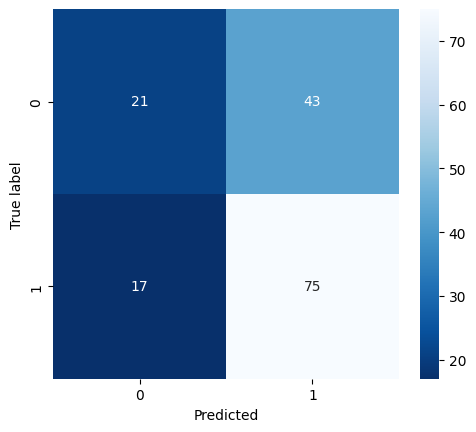

In [123]:
confusion5 = confusion_matrix(y5_test, y5_pred, labels=['не вкусно','вкусно'])
sns.heatmap(confusion5, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

In [124]:
recall5 = recall_score(y5_test, y5_pred, pos_label='вкусно') # TP/(TP + FN)
precision5 = precision_score(y5_test, y5_pred, pos_label='вкусно') # TP/(TP + FP)
recall5, precision5

(0.8152173913043478, 0.635593220338983)

In [125]:
# создадим таблицу с отсортированными предсказаниями.
y5_proba = clf5.predict_proba(X5_test)[:,0]

data2 = pd.DataFrame(zip(y5_test, y5_proba), columns = ['реальный вкус', 'y5_proba'])

# Посчитаем значение precision при разных порогах, для этого создадим функцию:

thresholds2 = [round(i,2) for i in np.linspace(0.1,1, num = 40, endpoint=False)]

# добавим столбцы
values = []
columns = []
for i in thresholds2:
    columns.append('y5_pred_'+str(i))
    data2['y5_pred_'+ str(i)] = data2['y5_proba'].apply(lambda x: 'вкусно' if x >= i else 'не вкусно')
    precision_f = precision_score(y5_test, data2['y5_pred_'+str(i)], pos_label = 'вкусно')
    values.append(precision_f)

costs2 = pd.DataFrame(zip(columns, values),columns = ['Порог', 'Precision'])
costs2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

Порог  Precision
0    y5_pred_0.1   0.589744
1   y5_pred_0.12   0.589744
2   y5_pred_0.15   0.589744
3   y5_pred_0.17   0.589744
4   y5_pred_0.19   0.589744
5   y5_pred_0.21   0.589744
6   y5_pred_0.24   0.593548
7   y5_pred_0.26   0.597403
8   y5_pred_0.28   0.597403
9    y5_pred_0.3   0.609272
10  y5_pred_0.32   0.610738
11  y5_pred_0.35   0.616438
12  y5_pred_0.37   0.620690
13  y5_pred_0.39   0.612676
14  y5_pred_0.42   0.611940
15  y5_pred_0.44   0.603053
16  y5_pred_0.46   0.606299
17  y5_pred_0.48   0.628099
18   y5_pred_0.5   0.635593
19  y5_pred_0.53   0.642202
20  y5_pred_0.55   0.636364
21  y5_pred_0.57   0.639175
22   y5_pred_0.6   0.654762
23  y5_pred_0.62   0.657143
24  y5_pred_0.64   0.646154
25  y5_pred_0.66   0.622642
26  y5_pred_0.68   0.659574
27  y5_pred_0.71   0.677419
28  y5_pred_0.73   0.650000
29  y5_pred_0.75   0.800000
30  y5_pred_0.77   1.000000
31   y5_pred_0.8   1.000000
32  y5_pred_0.82   1.000000
33  y5_pred_0.84   0.000000
34  y5_pred_0.86   0.000000
35  y5_pred_0.89   0.000000
36  y5_pred_0.91   0.000000
37  y5_pred_0.93   0.000000
38  y5_pred_0.96   0.000000
39  y5_pred_0.98   0.000000

In [126]:
pred_proba5 = clf5.predict_proba(X5_test)[:, 0] # вероятности вкусного молока
new_threshold5 = 0.77 # значение порога, при котором значение метрики precision - max, а FP минимально
preds5 = np.where(pred_proba5 > new_threshold5, "вкусно", "не вкусно")

recall5 = recall_score(y5_test, preds5, pos_label='вкусно')
precision5 = precision_score(y5_test, preds5, pos_label='вкусно')

recall5, precision5

(0.05434782608695652, 1.0)

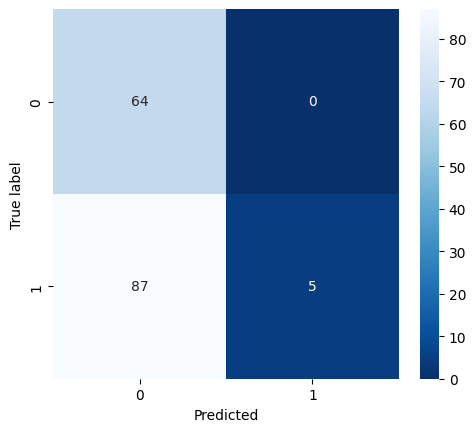

In [127]:
confusion_min_FP5 = confusion_matrix(y5_test, preds5, labels=['не вкусно','вкусно'])
sns.heatmap(confusion_min_FP5, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

In [128]:
for feature_number, feature_name in enumerate(X5_train.columns):
    exp_weight = math.exp(clf5.coef_[0, feature_number])
    print(f"{feature_name:<20}: {exp_weight:+.6f}")

тип_пастбища_холмистое: +0.592147
возраст_менее_2_лет : +1.005886
жирность,%          : +1.076749
белок,%             : +0.773897
спо                 : +0.636131


<font color='blue'> <h2>6.4  Прогноз вкуса молока новых коров

С помощью обученной модели LogisticRegression №2 спрогнозируем вкус молока коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv. <br>
·	Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки. <br>
·	Получите прогноз вкуса молока коров. <br>

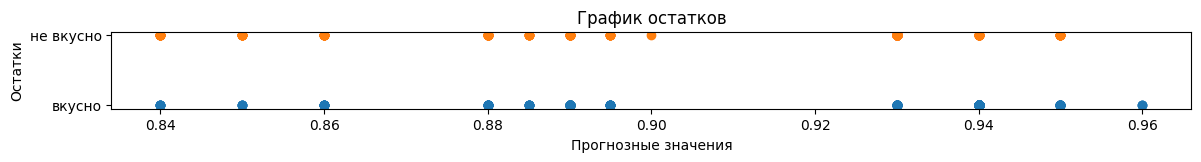

In [129]:
# Рассмотрим распределение СПО в зависимости от вкуса молока
spo_testy = ferma_main5[['вкус_молока', 'спо']]
spo_testy_yes = spo_testy[spo_testy['вкус_молока'] == 'вкусно']
spo_testy_no = spo_testy[spo_testy['вкус_молока'] == 'не вкусно']
testy1 = spo_testy_yes['вкус_молока']
testy2 = spo_testy_no['вкус_молока']
spo1 = spo_testy_yes['спо']
spo2 = spo_testy_no['спо']

plt.figure(figsize=(16, 1))
plt.scatter(spo1, testy1)
plt.scatter(spo2, testy2)
plt.xlabel('Прогнозные значения')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.show()

In [130]:
testy_yes = spo_testy_yes.value_counts().sort_values(ascending=False)
testy_yes

вкус_молока  спо  
вкусно       0.940    140
             0.890     70
             0.930     45
             0.950     41
             0.880     23
             0.895     14
             0.860     10
             0.885      8
             0.840      7
             0.850      5
             0.960      3
Name: count, dtype: int64

In [131]:
spo_testy_no.value_counts().sort_values(ascending=False)

вкус_молока  спо  
не вкусно    0.930    95
             0.880    34
             0.940    31
             0.890    23
             0.840    17
             0.860    15
             0.950    14
             0.850    12
             0.895     8
             0.885     7
             0.900     1
Name: count, dtype: int64

In [132]:
cow_buy5 = cow_buy.copy()
cow_buy5.insert(7, 'спо', 0.94)
cow_buy5.head(1)

порода тип_пастбища порода_папы_быка  имя_папы  текущая_жирность,%  \
0  Вис Бик Айдиал    холмистое           Айдиал  Геркулес                3.58   

   текущий_уровень_белок,%      возраст   спо  
0                    3.076  более_2_лет  0.94

In [133]:
# Подготовим данные к соответствию:
cat_col_names5 = ['тип_пастбища', 'возраст']
num_col_names5 = ['жирность,%', 'белок,%', 'спо']

cow_buy5 = cow_buy5.rename (columns= {'текущая_жирность,%': 'жирность,%', 'текущий_уровень_белок,%': 'белок,%'})
cow_buy5.head(1)

порода тип_пастбища порода_папы_быка  имя_папы  жирность,%  \
0  Вис Бик Айдиал    холмистое           Айдиал  Геркулес        3.58   

   белок,%      возраст   спо  
0    3.076  более_2_лет  0.94

In [134]:
X5_cb = cow_buy5.drop({'порода','порода_папы_быка', 'имя_папы'} , axis=1)
X5_cb.head(1)

тип_пастбища  жирность,%  белок,%      возраст   спо
0    холмистое        3.58    3.076  более_2_лет  0.94

In [135]:
# Входные данные
X5_cb = cow_buy5.drop({'порода','порода_папы_быка', 'имя_папы'} , axis=1)

cat_cb5 = ['тип_пастбища', 'возраст']
num_cb5 = ['жирность,%', 'белок,%', 'спо']

# трансформируем категориальные признаки
X5_ohe_cb = encoder5.transform(X5_cb[cat_cb5])

# сохраним в переменной encoder_col_names названия новых столбцов, ранее бывших категориальными
encoder_col_names_cb5 = encoder5.get_feature_names_out()

# трансформируем количественные признаки
X5_scaled_cb = scaler5.transform(X5_cb[num_cb5])

# создаём датафрейм из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажем из переменной encoder_col_names

X5_ohe_cb = pd.DataFrame(X5_ohe_cb, columns=encoder_col_names_cb5)

X5_scaled_cb = pd.DataFrame(X5_scaled_cb, columns=num_cb5)

# объединяем все преобразованные данные в датафрейм
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X5_cb = pd.concat([X5_ohe_cb, X5_scaled_cb], axis=1)

# фильтруем вероятности предсказания
y5_pred_cb = clf5.predict_proba(X5_cb)[:, 0]
new_threshold5 = 0.77 # значение порога, при котором значение метрики precision - max, а FP минимально
pred_cb5 = np.where(y5_pred_cb > new_threshold5, "вкусно", "не вкусно")

pred_cb5

array(['не вкусно', 'не вкусно', 'не вкусно', 'не вкусно', 'не вкусно',
       'не вкусно', 'не вкусно', 'не вкусно', 'не вкусно', 'вкусно',
       'не вкусно', 'не вкусно', 'не вкусно', 'не вкусно', 'не вкусно',
       'не вкусно', 'вкусно', 'не вкусно', 'не вкусно', 'не вкусно'],
      dtype='<U9')

<font color='blue'> <h1> 7. Итоговые выводы

In [136]:
# Добавим прогнозы вкуса молока и удоя коров «ЭкоФермы» в датафрейм с коровами, покупку которых рассматривает фермер.
# Отберём коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко.

cow_buy['удой_кг'] = predictions_cb
cow_buy['вкус_молока'] = pred_cb5
cow_buy_yes = cow_buy[(cow_buy['вкус_молока'] == 'вкусно') & (cow_buy['удой_кг'] >= 6000)]
cow_buy_yes.head(20)

порода тип_пастбища порода_папы_быка  имя_папы  \
9   РефлешнСоверинг    холмистое           Айдиал    Буйный   
16   Вис Бик Айдиал    холмистое          Соверин  Соловчик   

    текущая_жирность,%  текущий_уровень_белок,%      возраст      удой_кг  \
9                 3.40                    3.079  менее_2_лет  6400.619963   
16                3.73                    3.079  более_2_лет  6334.076093   

   вкус_молока  
9       вкусно  
16      вкусно

In [137]:
cow_buy.head()

порода тип_пастбища порода_папы_быка  имя_папы  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный   
2  РефлешнСоверинг    равнинное          Соверин     Барин   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный   

   текущая_жирность,%  текущий_уровень_белок,%      возраст      удой_кг  \
0                3.58                    3.076  более_2_лет  6609.253673   
1                3.54                    3.081  менее_2_лет  6358.102672   
2                3.59                    3.074  более_2_лет  6283.593214   
3                3.40                    3.061  более_2_лет  6599.114441   
4                3.64                    3.074  более_2_лет  6544.619925   

  вкус_молока  
0   не вкусно  
1   не вкусно  
2   не вкусно  
3   не вкусно  
4   не вкусно

Коротко опишем результаты работы моделей для фермера:<br>
<br> <b>Предсказания удоев однозначно нужно улучшать, т.к. в выборку попали коровы с возрастом менее 2-х лет, которые однозначно дают меньше 6000 литров, согласно диаграмма рассеяния.</b>
<br>
<b>Точность предсказания удоев коров:<br></b>
'R2_3 LinearRegression = 0.841' - средняя ошибка меньше дисперсии  в 0,159 раз <br>
MSE_3 LinearRegression = 34749.382 - Среднеквадратичная ошибка ошибка<br>
RMSE_3 LinearRegression = 186.412<br>
MAE_3 LinearRegression = 146.717 - Средняя абсолютная ошибка<br>

<br>
<b>Точность предсказания качества молока:<br></b>
accuracy  = 0.615<br>
recall5 = 0.054<br>
precision5 = 1.0<br>
<b>C вкусным молоком и нужным объёмом удоя оказались две коровы</b>

In [138]:
# C минимальным риском фермер может купить коров с удоями из предсказанных равных 6146 литров удоя.
# Это компенсирует среднюю абсолютную ошибку.
cow_buy_yes2 = cow_buy[(cow_buy['вкус_молока'] == 'вкусно') & (cow_buy['удой_кг'] >= 6134)]
cow_buy_yes2.shape

# Т.е. всех короов из предложенных

(2, 9)

<b>Какие ещё рекомендации можно ему дать?</b><br>
Показатель СПО · СПО (Сахаро-протеиновое соотношение) — отношения сахара к протеину в корме коровы на уровне 0,93 с большой вероятностью заставят коров дать невкусное молоко.

<b>Сделайте выводы о моделях линейной регрессии и логистической регрессии. </b><br>
- линейная регрессия требует линейных связей между входными параметрами и искомыми. Это накладывает отпечаток на подготовку данных.<br>
- логистическая регрессия предназначена для классификации данных. Она определяет вероятности  вклада входных параметров в принадлежность к калссу. Двигая уровнем разделения на классы (от 0,5) можно регулировать FP - появление ложноположительных предсказаний и FN - ложноотрицательных, что важно для некоторых задач.<br>
Не всегда эти значения можно свести к нулю.<br>

<b>Какие способы улучшения качества регрессионной модели вы использовали в этой задаче?</b><br>
Для улучшения качества регрессионной модели были использованы три метода улучшающие линейность:<br>
    - добавление признаков <br>
    - возведение в квадрат значений признаков <br>
    - улучшение линейности двух кластерной системы через разделение значений на два класса<br>

<b>Возможно ли ещё улучшить результаты регрессионной модели? Если можно, то как? Если нет, то почему?</b><br>
- можно собрать другие категориальные данные (например вес коров)<br>
- можно поработать с данными внутри представленных категорий на предмет улучшения линейности<br>
- проанализировать использованные признаки на предмет коллинеарности<br>

<b>Какие метрики моделей классификации, в том числе логистической регрессии, важны при анализе рисков или экономических расчётов?</b><br>
Важны метрики recall и precision:<br>
recall = TP/(TP+FN) - это позволит оценить долю правильных предсказаний из всех позитивных событий<br>
precision = TP/(TP+FP) - это позволит оценить долю ложных предсказаний, чтобы при необходимости минимизировать их.   <br>
    

Не получалось без замены на 1 и 0. Пробовал найти аргумент для precision_recall_curve, похожий на labels=['не вкусно','вкусно'], как для confusion_matrix, но не нашёл.

In [139]:
y_true = y4_test.replace(['вкусно', 'не вкусно'],[1, 0])
y_true = list(y_true[:156])

In [140]:
probas_pred = y4_pred
probas_pred[probas_pred == 'вкусно'] = 1
probas_pred[probas_pred == 'не вкусно'] = 0

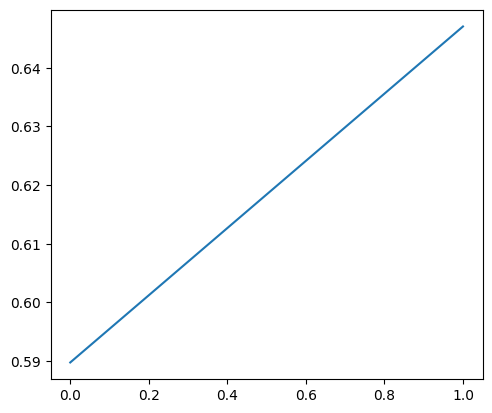

In [141]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_true, probas_pred)
plt.plot(thresholds, precision[:-1], label='Precision');

In [142]:
precision, recall, thresholds

(array([0.58974359, 0.64705882, 1.        ]),
 array([1.        , 0.83695652, 0.        ]),
 array([0, 1], dtype=object))